In [1]:
import generate_masterdf as gm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from generate_plots import subject_wise_error_plot, quick_visualization, distribution_plots
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 4)

We have 9 subjects so far: ['sub01', 'sub03', 'sub06', 'sub08', 'sub12', 'sub13', 'sub14', 'sub15', 'sub16']

Loading existing dataframe! If this is not desired, delete the current mater_df.csv


In [2]:
df = gm.master_df
print('Dataframe description')
df.info()

Dataframe description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subjID                10000 non-null  int64  
 1   day                   10000 non-null  int64  
 2   tnum                  10000 non-null  int64  
 3   rnum                  10000 non-null  int64  
 4   istms                 10000 non-null  int64  
 5   ispro                 10000 non-null  int64  
 6   instimVF              10000 non-null  int64  
 7   breakfix              10000 non-null  int64  
 8   no_prim_sacc          10000 non-null  int64  
 9   small_sacc            10000 non-null  int64  
 10  large_error           10000 non-null  int64  
 11  rejtrials             10000 non-null  int64  
 12  TarX                  10000 non-null  float64
 13  TarY                  10000 non-null  float64
 14  isaccX                9327 non-null   float64
 15

In [3]:
df.describe()

subjID        day       tnum        rnum     istms    ispro  \
count  10000.00  10000.000  10000.000  10000.0000  10000.00  10000.0   
mean       9.52      1.920     20.500      5.5000      0.64      0.5   
std        5.27      0.796     11.544      2.8724      0.48      0.5   
min        1.00      1.000      1.000      1.0000      0.00      0.0   
25%        6.00      1.000     10.750      3.0000      0.00      0.0   
50%       12.00      2.000     20.500      5.5000      1.00      0.5   
75%       14.00      3.000     30.250      8.0000      1.00      1.0   
max       16.00      3.000     40.000     10.0000      1.00      1.0   

       instimVF    breakfix  no_prim_sacc  small_sacc  large_error  \
count   10000.0  10000.0000    10000.0000  10000.0000   10000.0000   
mean        0.5      0.1083        0.0542      0.0131       0.0286   
std         0.5      0.3108        0.2264      0.1137       0.1667   
min         0.0      0.0000        0.0000      0.0000       0.0000   
25%         0.0      0.0000        0.0000      0.0000       0.0000   
50%         0.5      0.0000        0.0000      0.0000       0.0000   
75%         1.0      0.0000        0.0000      0.0000       0.0000   
max         1.0      1.0000        1.0000      1.0000       1.0000   

        rejtrials        TarX        TarY     isaccX     isaccY     fsaccX  \
count  10000.0000  1.0000e+04  10000.0000  9327.0000  9327.0000  9458.0000   
mean       0.0828  6.9278e-18     -4.2219     0.1660    -3.6920    -0.0554   
std        0.2756  1.2532e+01      2.7625    12.4133     3.2121    12.3852   
min        0.0000 -1.7780e+01    -13.4041   -23.1741   -89.7320   -20.0539   
25%        0.0000 -1.3101e+01     -5.2570   -12.5752    -5.1615   -12.9401   
50%        0.0000  0.0000e+00     -4.1286    -0.7270    -3.5619    -0.3555   
75%        0.0000  1.3101e+01     -2.5872    12.8281    -1.8832    12.7479   
max        1.0000  1.7780e+01      4.4038    22.0723    65.7829    20.6013   

          fsaccY   isacc_err   fsacc_err  isacc_theta_err  fsacc_theta_err  \
count  9458.0000  9.3270e+03  9.4580e+03        9327.0000       9.4580e+03   
mean     -3.9534  2.5339e+00  1.9661e+00           0.0421       2.6788e-02   
std       3.1551  3.5501e+00  3.5055e+00           0.4444       4.1989e-01   
min     -91.2678  1.3323e-15  1.0025e-15          -3.0367      -3.1211e+00   
25%      -5.3471  1.0076e+00  6.8273e-01          -0.0442      -3.5613e-02   
50%      -3.7858  1.7610e+00  1.2523e+00           0.0032       2.2204e-15   
75%      -2.1744  2.8632e+00  2.0685e+00           0.0724       5.1046e-02   
max      65.7829  8.8405e+01  8.9869e+01           3.1382       3.1382e+00   

       corrected_theta_err  isacc_radius_err  fsacc_radius_err  \
count            9327.0000         9327.0000        9.4580e+03   
mean               -0.0026           -0.5097       -3.6775e-01   
std                 0.2143            2.7345        2.3859e+00   
min                -2.8477          -14.8253       -1.5813e+01   
25%                -0.0176           -1.6417       -1.0642e+00   
50%                 0.0000           -0.2592       -2.8511e-13   
75%                 0.0045            0.8941        6.3910e-01   
max                 3.1402           74.2371        7.6170e+01   

       corrected_radius_err       nsacc  calib_err   isacc_rt   fsacc_rt  \
count             9327.0000  10000.0000  9947.0000  9327.0000  9458.0000   
mean                 0.2533      1.8334     2.1796     0.3570     0.5149   
std                  1.9638      1.3232     3.7141     0.1386     0.1882   
min                -37.3665      0.0000     0.0065     0.0040     0.0070   
25%                 -0.1288      1.0000     0.4056     0.2620     0.3390   
50%                  0.0000      2.0000     0.6923     0.3100     0.5160   
75%                  0.7701      2.0000     1.4472     0.4130     0.6640   
max                 16.2158     26.0000    35.5759     1.0010     1.0010   

       isacc_peakvel  fsacc_peakvel    TarT

In [4]:
df.describe(include=object)

trial_type TMS_condition
count        10000         10000
unique           4             3
top     pro_intoVF        No TMS
freq          2500          3600

In [5]:
n_rows_original = len(df)
# Filter out entries with 'rejtrials' == 1
df_filtered = df[(df['rejtrials'] != 1) & (df['fsacc_theta_err'] < 2) & (df['fsacc_theta_err'] > -2)].copy()
df_filtered = df_filtered.dropna()
n_rows_filtered = len(df_filtered)
print(f"Original = {n_rows_original}, after filtering = {n_rows_filtered} trials.")
print()
print('Dataframe description after filtering')
df_filtered.info()

Original = 10000, after filtering = 8974 trials.

Dataframe description after filtering
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8974 entries, 0 to 9998
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subjID                8974 non-null   int64  
 1   day                   8974 non-null   int64  
 2   tnum                  8974 non-null   int64  
 3   rnum                  8974 non-null   int64  
 4   istms                 8974 non-null   int64  
 5   ispro                 8974 non-null   int64  
 6   instimVF              8974 non-null   int64  
 7   breakfix              8974 non-null   int64  
 8   no_prim_sacc          8974 non-null   int64  
 9   small_sacc            8974 non-null   int64  
 10  large_error           8974 non-null   int64  
 11  rejtrials             8974 non-null   int64  
 12  TarX                  8974 non-null   float64
 13  TarY                  8974 non-null

In [6]:
# Summary across conditions for subjects
table_summary = pd.pivot_table(df, values = 'fsacc_err', index = ['subjID'], columns = ['TMS_condition', 'ispro'], aggfunc = lambda x: np.sum(~pd.isnull(x)))
table_summary

TMS_condition No TMS      TMS intoVF      TMS outVF     
ispro              0    1          0    1         0    1
subjID                                                  
1                200  199        197  199       199  200
3                200  197        200  200       200  200
6                199  197        199  188       193  198
8                157  139        142  145       149  134
12               193  187         99   97        96   96
13               197  194        192  190       189  196
14               197  199        100   99       100  100
15               199  199        195  197       197  196
16               179  177        196  190       195  186

In [7]:
df_filtered.describe()

subjID        day       tnum       rnum      istms     ispro  \
count  8974.0000  8974.0000  8974.0000  8974.0000  8974.0000  8974.000   
mean      9.4197     1.9220    20.4743     5.4728     0.6387     0.495   
std       5.3808     0.7942    11.5249     2.8751     0.4804     0.500   
min       1.0000     1.0000     1.0000     1.0000     0.0000     0.000   
25%       3.0000     1.0000    10.0000     3.0000     0.0000     0.000   
50%      12.0000     2.0000    20.0000     5.0000     1.0000     0.000   
75%      14.0000     3.0000    30.0000     8.0000     1.0000     1.000   
max      16.0000     3.0000    40.0000    10.0000     1.0000     1.000   

        instimVF   breakfix  no_prim_sacc  small_sacc  large_error  rejtrials  \
count  8974.0000  8974.0000        8974.0      8974.0       8974.0     8974.0   
mean      0.5019     0.0925           0.0         0.0          0.0        0.0   
std       0.5000     0.2897           0.0         0.0          0.0        0.0   
min       0.0000     0.0000           0.0         0.0          0.0        0.0   
25%       0.0000     0.0000           0.0         0.0          0.0        0.0   
50%       1.0000     0.0000           0.0         0.0          0.0        0.0   
75%       1.0000     0.0000           0.0         0.0          0.0        0.0   
max       1.0000     1.0000           0.0         0.0          0.0        0.0   

            TarX       TarY     isaccX     isaccY     fsaccX     fsaccY  \
count  8974.0000  8974.0000  8974.0000  8974.0000  8974.0000  8974.0000   
mean     -0.0436    -4.1353     0.2332    -3.7436     0.0180    -4.0282   
std      12.5911     2.7212    12.5084     2.8182    12.5127     2.8243   
min     -17.7804   -13.4041   -23.1741   -15.8848   -20.0539   -17.6414   
25%     -13.1288    -5.1194   -12.6176    -5.1855   -12.9779    -5.3693   
50%      -2.7524    -4.0460    -0.7574    -3.6224    -2.2333    -3.8569   
75%      13.1220    -2.5322    12.9218    -1.9976    12.8595    -2.3013   
max      17.7528     4.4038    22.0723     8.9014    20.6013     5.7333   

        isacc_err   fsacc_err  isacc_theta_err  fsacc_theta_err  \
count  8.9740e+03  8.9740e+03        8974.0000       8.9740e+03   
mean   2.0316e+00  1.4298e+00           0.0276       9.3704e-03   
std    1.5314e+00  1.2591e+00           0.2317       1.1288e-01   
min    1.3323e-15  1.0025e-15          -2.4913      -1.9774e+00   
25%    9.8117e-01  6.5227e-01          -0.0427      -3.4155e-02   
50%    1.7087e+00  1.2082e+00           0.0024       1.7764e-15   
75%    2.7129e+00  1.9382e+00           0.0675       4.7672e-02   
max    9.9468e+00  1.4835e+01           3.1309       1.9804e+00   

       corrected_theta_err  isacc_radius_err  fsacc_radius_err  \
count            8974.0000         8974.0000        8.9740e+03   
mean               -0.0028           -0.3892       -1.9111e-01   
std                 0.1531            2.1023        1.5360e+00   
min                -2.7656           -9.9132       -1.4226e+01   
25%                -0.0171           -1.5654       -9.9125e-01   
50%                 0.0000           -0.2174       -1.8296e-13   
75%                 0.0042            0.9074        6.5197e-01   
max                 3.1338            9.6970        1.2981e+01   

       corrected_radius_err      nsacc  calib_err   isacc_rt   fsacc_rt  \
count             8974.0000  8974.0000  8974.0000  8974.0000  8974.0000   
mean                 0.1981     1.9250     1.9923     0.3552     0.5118   
std                  1.6108     1.2438     3.2629     0.1360     0.1864   
min                -14.5903     1.0000     0.0065     0.0060     0.0240   
25%                 -0.1419     1.0000     0.3957     0.2620     0.3380   
50%                  0.0000     2.0000     0.6708     0.3090     0.5120   
75%                  0.7372     2.0000     1.3399     0.4090     0.6580   
max                 15.6506    26.0000    18.5509     1.0010     1.0010   

       isacc_peakvel  fsacc_peakvel   TarTheta  TarRadius  isa

In [8]:
df_filtered.describe(include=object)

trial_type TMS_condition
count          8974          8974
unique            4             3
top     anti_intoVF        No TMS
freq           2275          3242

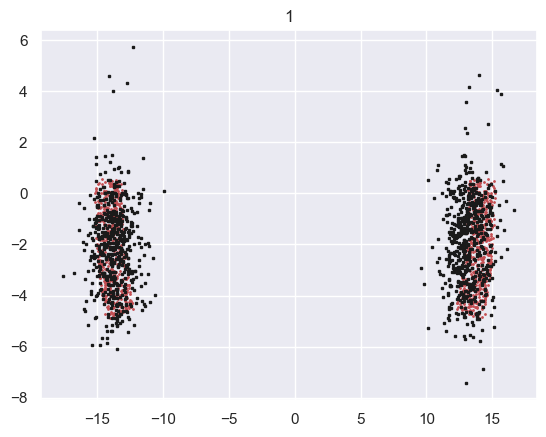

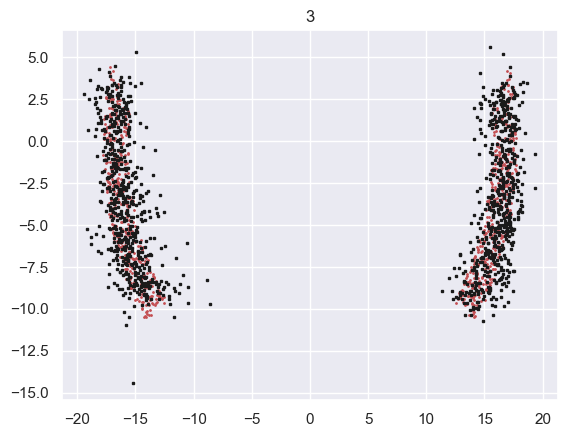

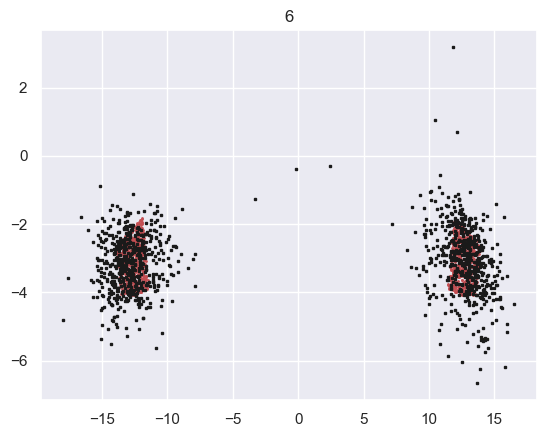

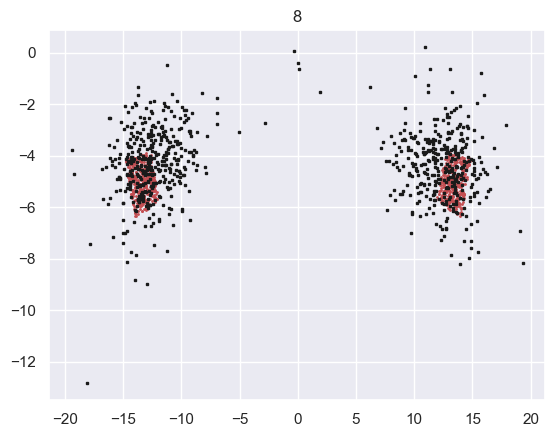

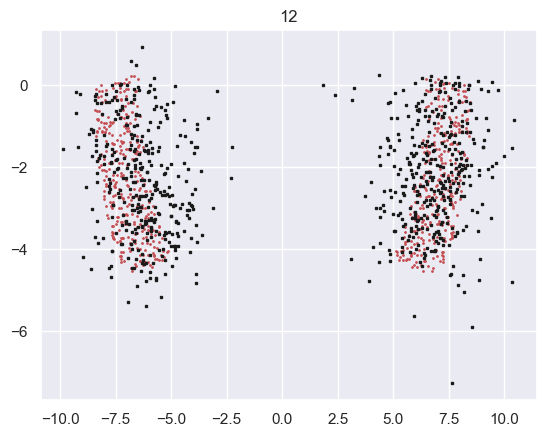

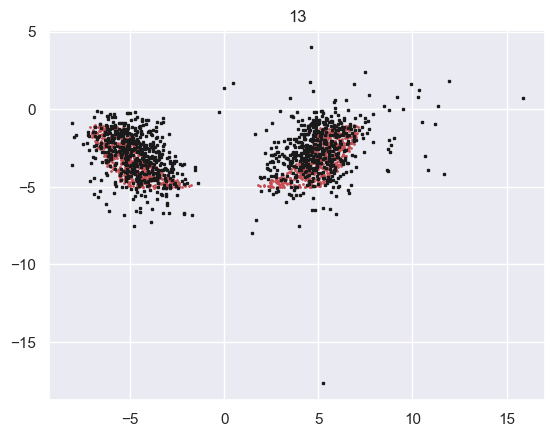

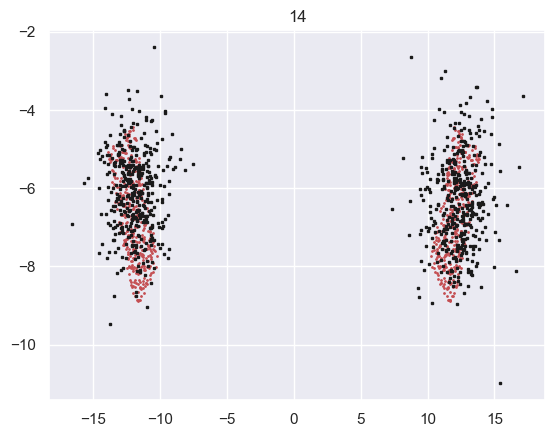

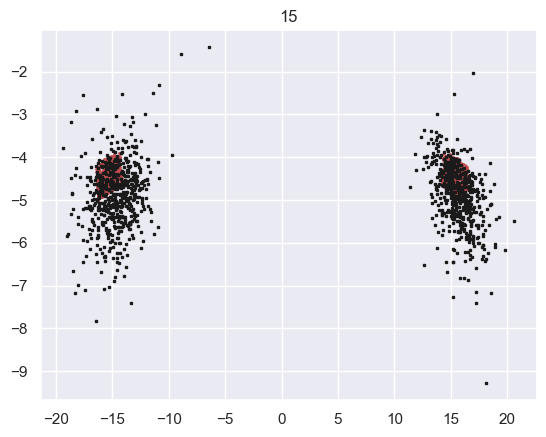

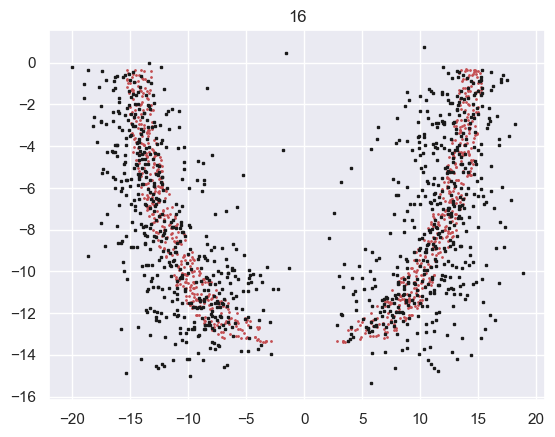

In [9]:
subjIDs = df_filtered['subjID'].unique()
#df_filtered = df_filtered[df_filtered['instimVF'] == 0 ]
for ii in range(len(subjIDs)):
    plt.figure()
    plt.plot(df_filtered[df_filtered['subjID']==subjIDs[ii]]['TarX'], df_filtered[df_filtered['subjID']==subjIDs[ii]]['TarY'], 'r.', markersize = 2)
    plt.plot(df_filtered[df_filtered['subjID']==subjIDs[ii]]['fsaccX'], df_filtered[df_filtered['subjID']==subjIDs[ii]]['fsaccY'], 'ks', markersize = 2)
    plt.title(str(subjIDs[ii]))

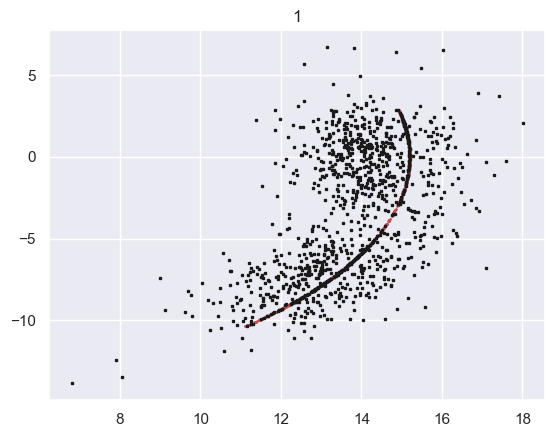

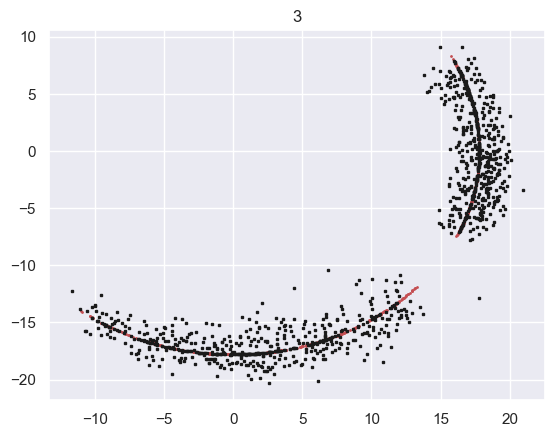

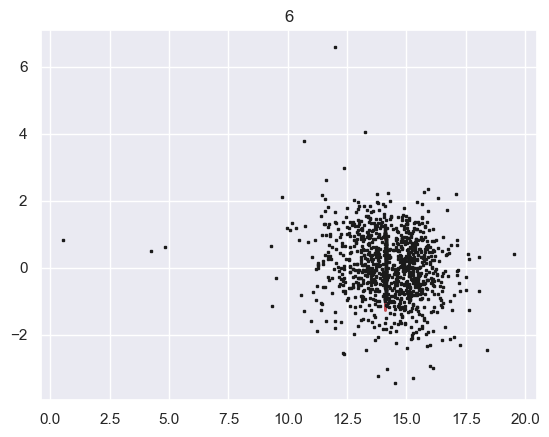

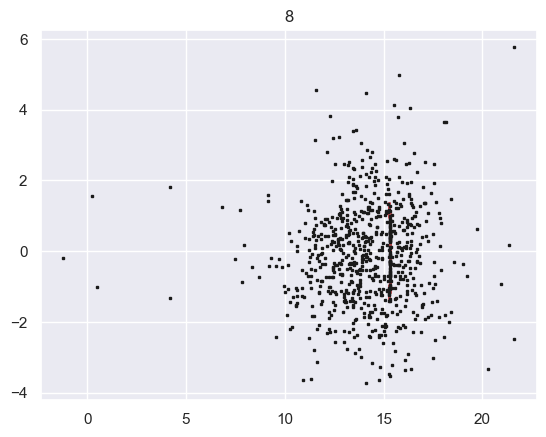

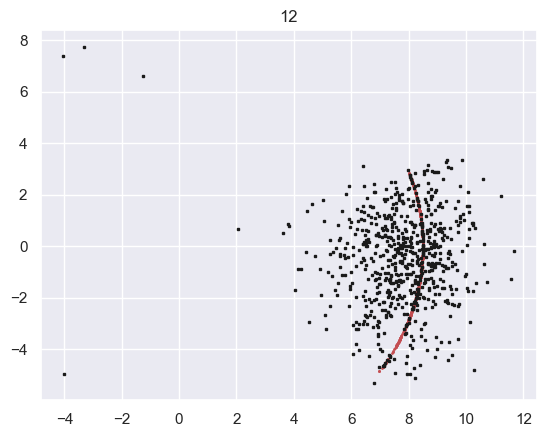

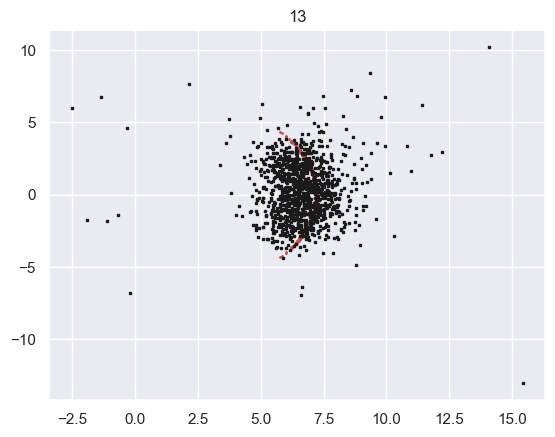

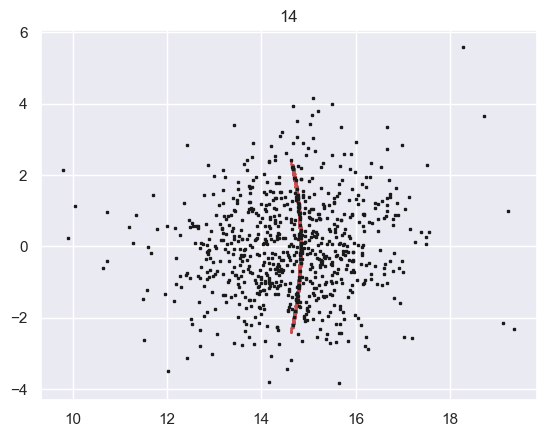

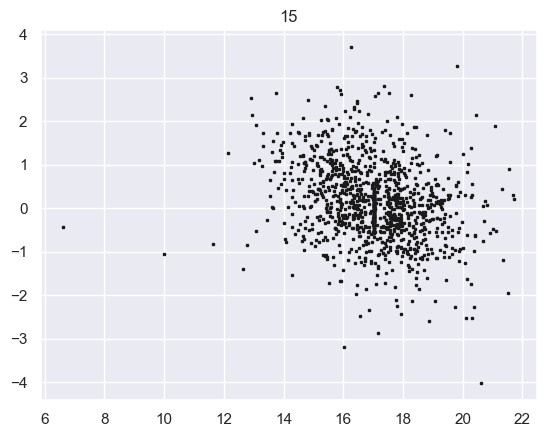

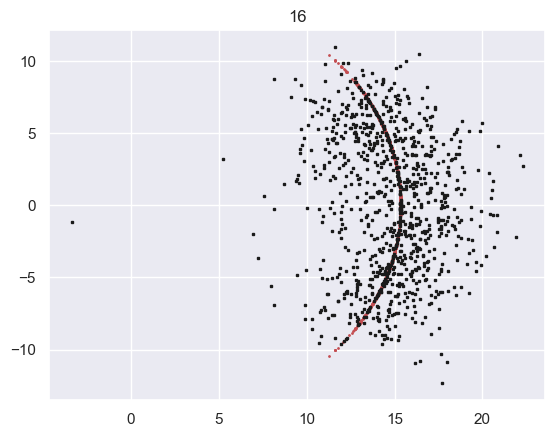

In [10]:
subjIDs = df_filtered['subjID'].unique()
#df_filtered = df_filtered[(df_filtered['TarTheta'] > -np.pi/2) & (df_filtered['TarTheta'] < np.pi/2) ]
for ii in range(len(subjIDs)):
    plt.figure()
    plt.plot(df_filtered[df_filtered['subjID']==subjIDs[ii]]['TarX_rotated_only'], df_filtered[df_filtered['subjID']==subjIDs[ii]]['TarY_rotated_only'], 'r.', markersize = 2)
    plt.plot(df_filtered[df_filtered['subjID']==subjIDs[ii]]['fsaccX_rotated_only'], df_filtered[df_filtered['subjID']==subjIDs[ii]]['fsaccY_rotated_only'], 'ks', markersize = 2)
    plt.title(str(subjIDs[ii]))

/Users/mrugank/anaconda3/envs/mgs/lib/python3.10/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


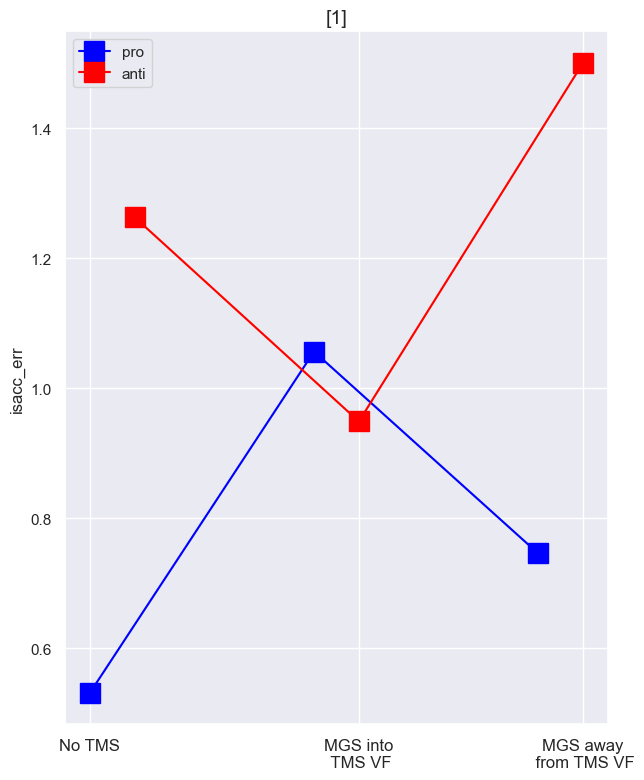

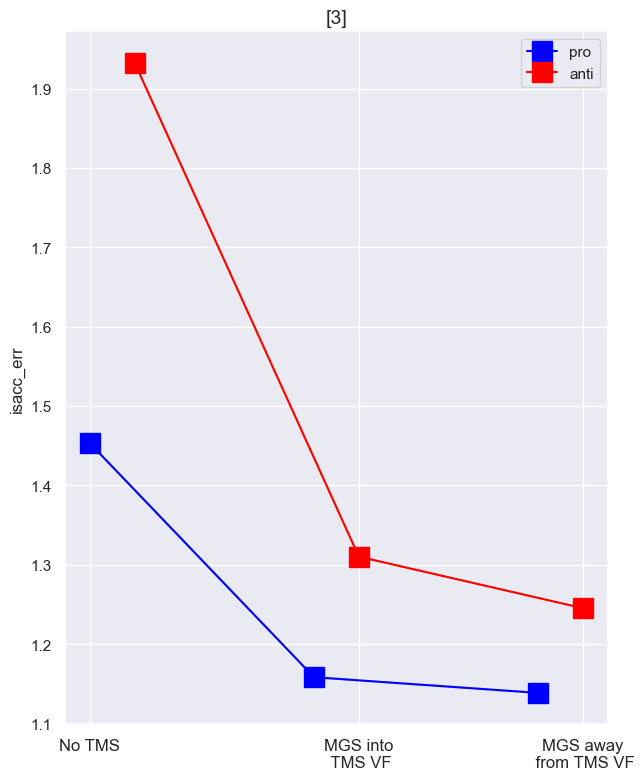

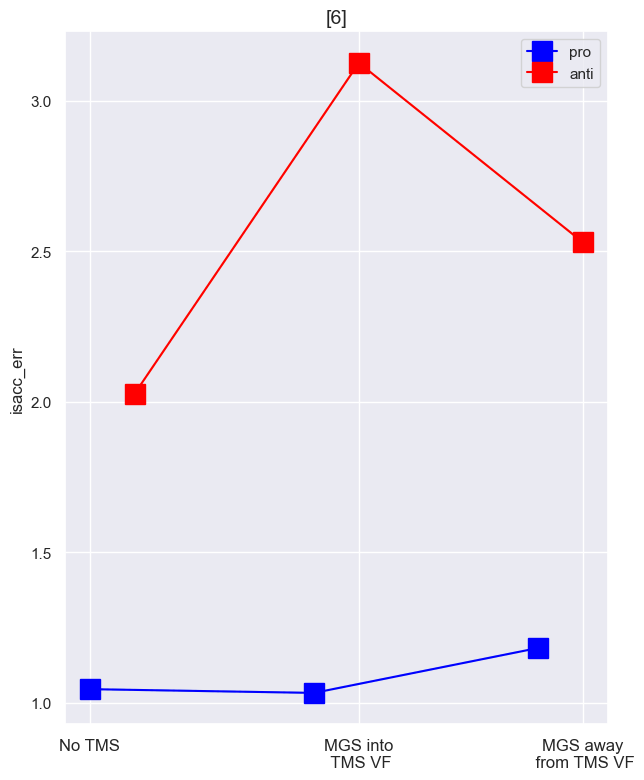

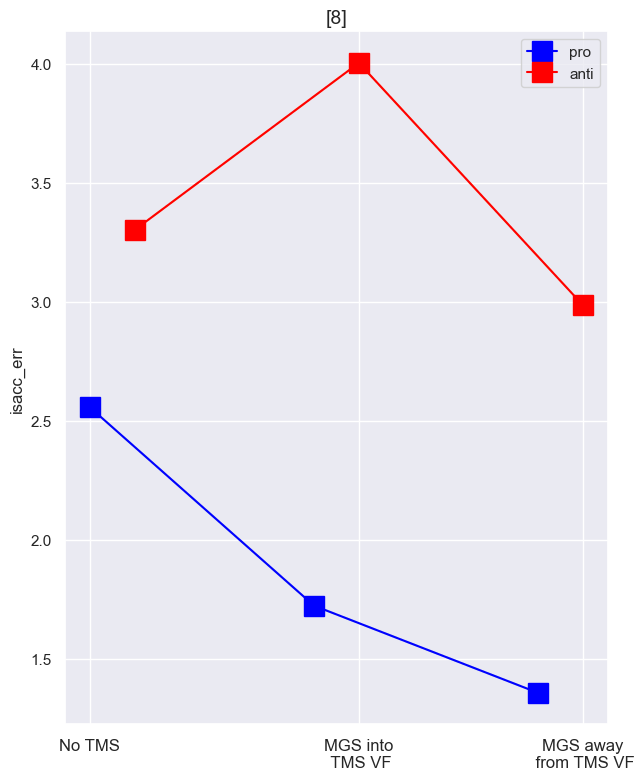

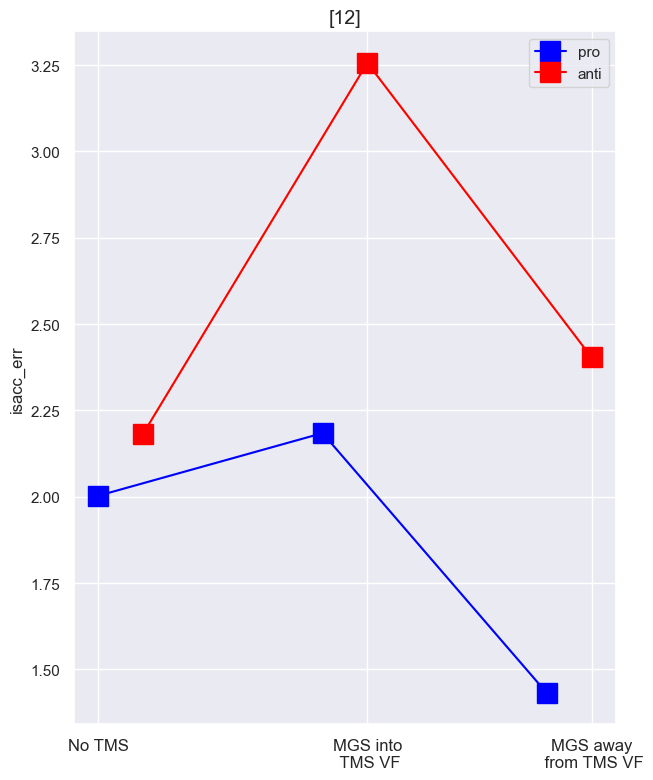

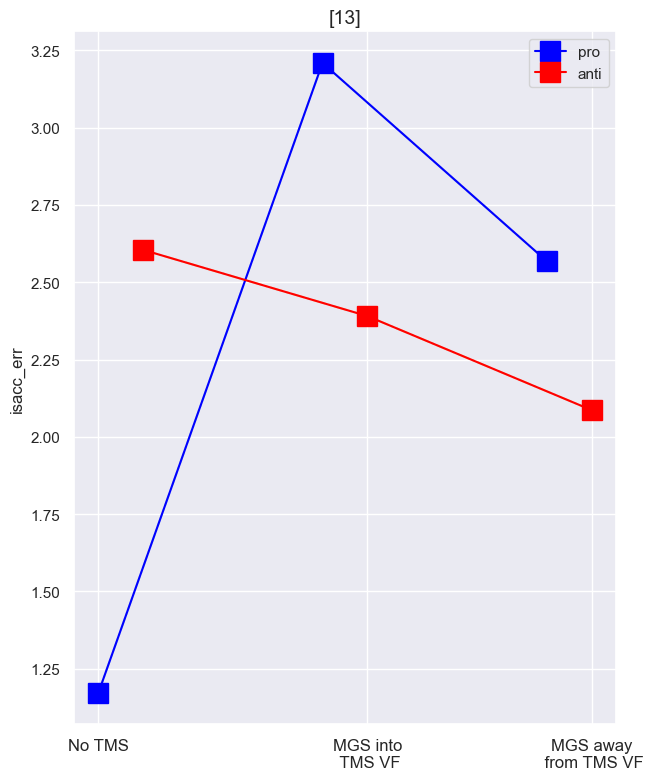

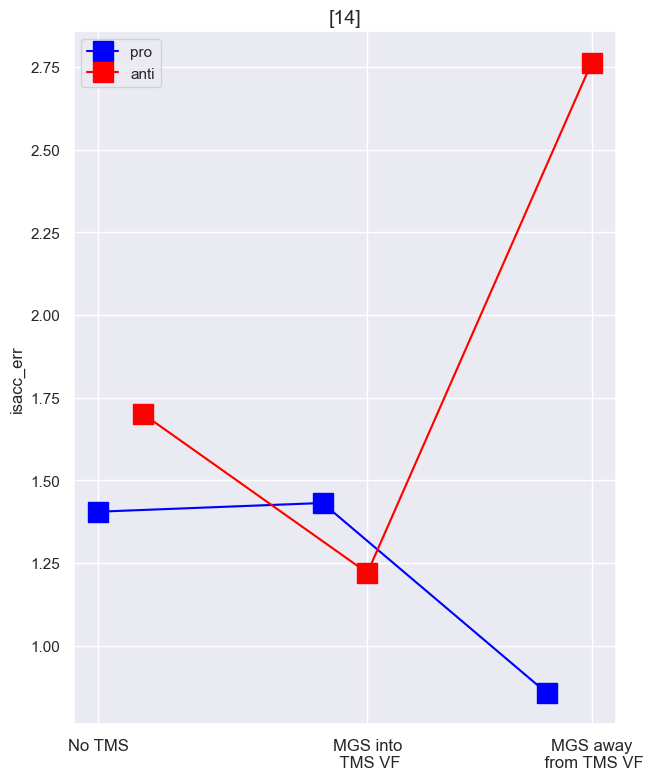

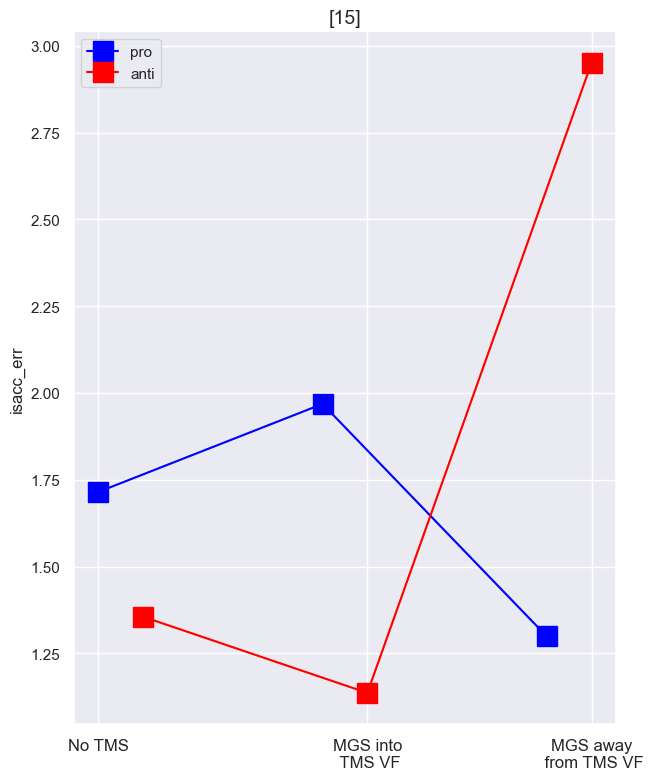

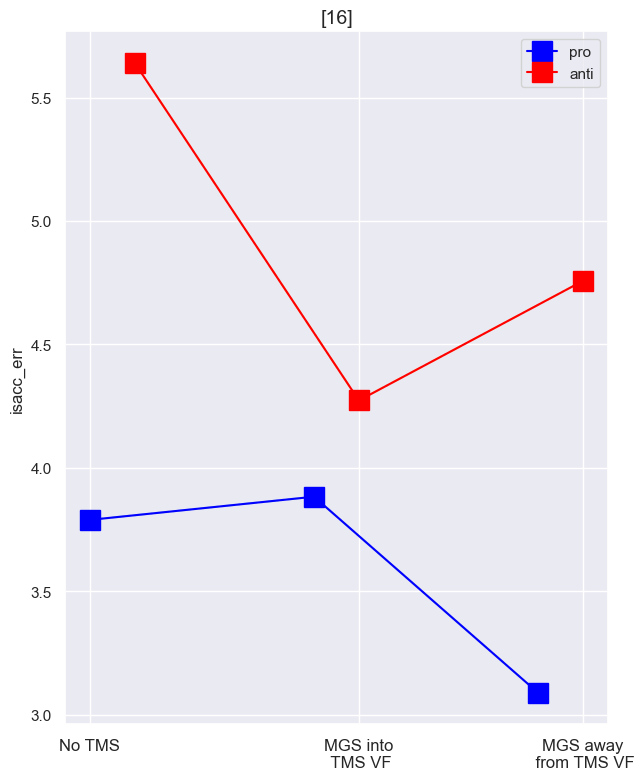

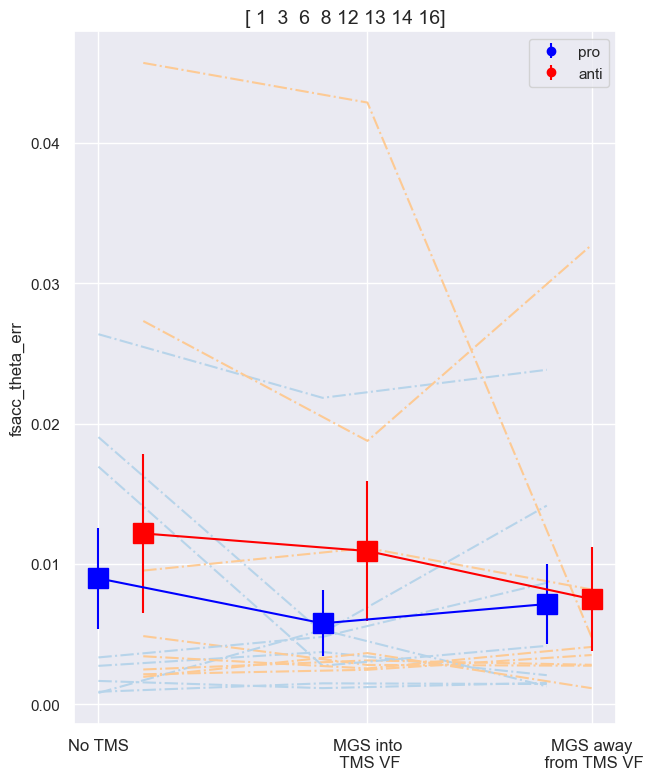

In [11]:
#subject_wise_error_plot(df_filtered, 'fsacc_theta_err')
#subject_wise_error_plot(df_filtered, 'corrected_theta_err')
#subject_wise_error_plot(df_filtered, 'isacc_radius_err')
#subject_wise_error_plot(df_filtered, 'fsacc_radius_err')

#subject_wise_error_plot(df_filtered, 'corrected_radius_err')
subjIDs = df_filtered['subjID'].unique()
for ii in range(len(subjIDs)):
    subject_wise_error_plot(df_filtered[df_filtered['subjID'] == subjIDs[ii]], 'isacc_err')
    #subject_wise_error_plot(df_filtered[df_filtered['subjID'] == subjIDs[ii]], 'fsacc_err')
#df_filtered['fsacc_theta_err'] = np.abs(df_filtered['fsacc_theta_err'])
subject_wise_error_plot(df_filtered[(df_filtered['subjID'] != 15) ], 'fsacc_theta_err')
#subject_wise_error_plot(df_filtered, 'isacc_peakvel')
#subject_wise_error_plot(df_filtered, 'fsacc_peakvel')

In [ ]:

subjIDs = df['subjID'].unique()
max_ax = 25
for ss in range(len(subjIDs)):
    subj_df =  df[df['subjID']==subjIDs[ss]]
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 15))
    plt.suptitle(subjIDs[ss])
    axes[0, 0].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[0, 0].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro')
    axes[0, 1].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[0, 1].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro')
    
    axes[1, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[1, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro')
    axes[1, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[1, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro')
    
    axes[2, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[2, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro')
    axes[2, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[2, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro')
    

    axes[0, 0].set_xlim([-max_ax, max_ax])
    axes[0, 0].set_ylim([-max_ax, max_ax])
    axes[0, 1].set_xlim([-max_ax, max_ax])
    axes[0, 1].set_ylim([-max_ax, max_ax])
    axes[1, 0].set_xlim([-max_ax, max_ax])
    axes[1, 0].set_ylim([-max_ax, max_ax])
    axes[1, 1].set_xlim([-max_ax, max_ax])
    axes[1, 1].set_ylim([-max_ax, max_ax])
    axes[2, 0].set_xlim([-max_ax, max_ax])
    axes[2, 0].set_ylim([-max_ax, max_ax])
    axes[2, 1].set_xlim([-max_ax, max_ax])
    axes[2, 1].set_ylim([-max_ax, max_ax])

    axes[0, 0].set_box_aspect(1)
    axes[0, 1].set_box_aspect(1)
    axes[1, 0].set_box_aspect(1)
    axes[1, 1].set_box_aspect(1)
    axes[2, 0].set_box_aspect(1)
    axes[2, 1].set_box_aspect(1)

    axes[0, 0].set_title('No TMS & pro')
    axes[0, 1].set_title('No TMS & anti')
    axes[1, 0].set_title('TMS intoVF & pro')
    axes[1, 1].set_title('TMS intoVF & anti')
    axes[2, 0].set_title('TMS outVF & pro')
    axes[2, 1].set_title('TMS outVF & anti')
    plt.show()
    

In [ ]:

subjIDs = df['subjID'].unique()
max_ax = 25
nbins = 70
for ss in range(len(subjIDs)):
    subj_df =  df[(df['subjID']==subjIDs[ss]) & (df['rejtrials']!=1)]
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 15))
    plt.suptitle(subjIDs[ss])
    axes[0, 0].hist2d(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[0, 0].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[0, 1].hist2d(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[0, 1].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    
    axes[1, 0].hist2d(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[1, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[1, 1].hist2d(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[1, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    
    axes[2, 0].hist2d(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[2, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[2, 1].hist2d(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[2, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    

    axes[0, 0].set_xlim([0, max_ax])
    axes[0, 0].set_ylim([-max_ax, max_ax])
    axes[0, 1].set_xlim([0, max_ax])
    axes[0, 1].set_ylim([-max_ax, max_ax])
    axes[1, 0].set_xlim([0, max_ax])
    axes[1, 0].set_ylim([-max_ax, max_ax])
    axes[1, 1].set_xlim([0, max_ax])
    axes[1, 1].set_ylim([-max_ax, max_ax])
    axes[2, 0].set_xlim([0, max_ax])
    axes[2, 0].set_ylim([-max_ax, max_ax])
    axes[2, 1].set_xlim([0, max_ax])
    axes[2, 1].set_ylim([-max_ax, max_ax])

    axes[0, 0].set_box_aspect(1)
    axes[0, 1].set_box_aspect(1)
    axes[1, 0].set_box_aspect(1)
    axes[1, 1].set_box_aspect(1)
    axes[2, 0].set_box_aspect(1)
    axes[2, 1].set_box_aspect(1)

    axes[0, 0].set_title('No TMS & pro')
    axes[0, 1].set_title('No TMS & anti')
    axes[1, 0].set_title('TMS intoVF & pro')
    axes[1, 1].set_title('TMS intoVF & anti')
    axes[2, 0].set_title('TMS outVF & pro')
    axes[2, 1].set_title('TMS outVF & anti')
    plt.show()

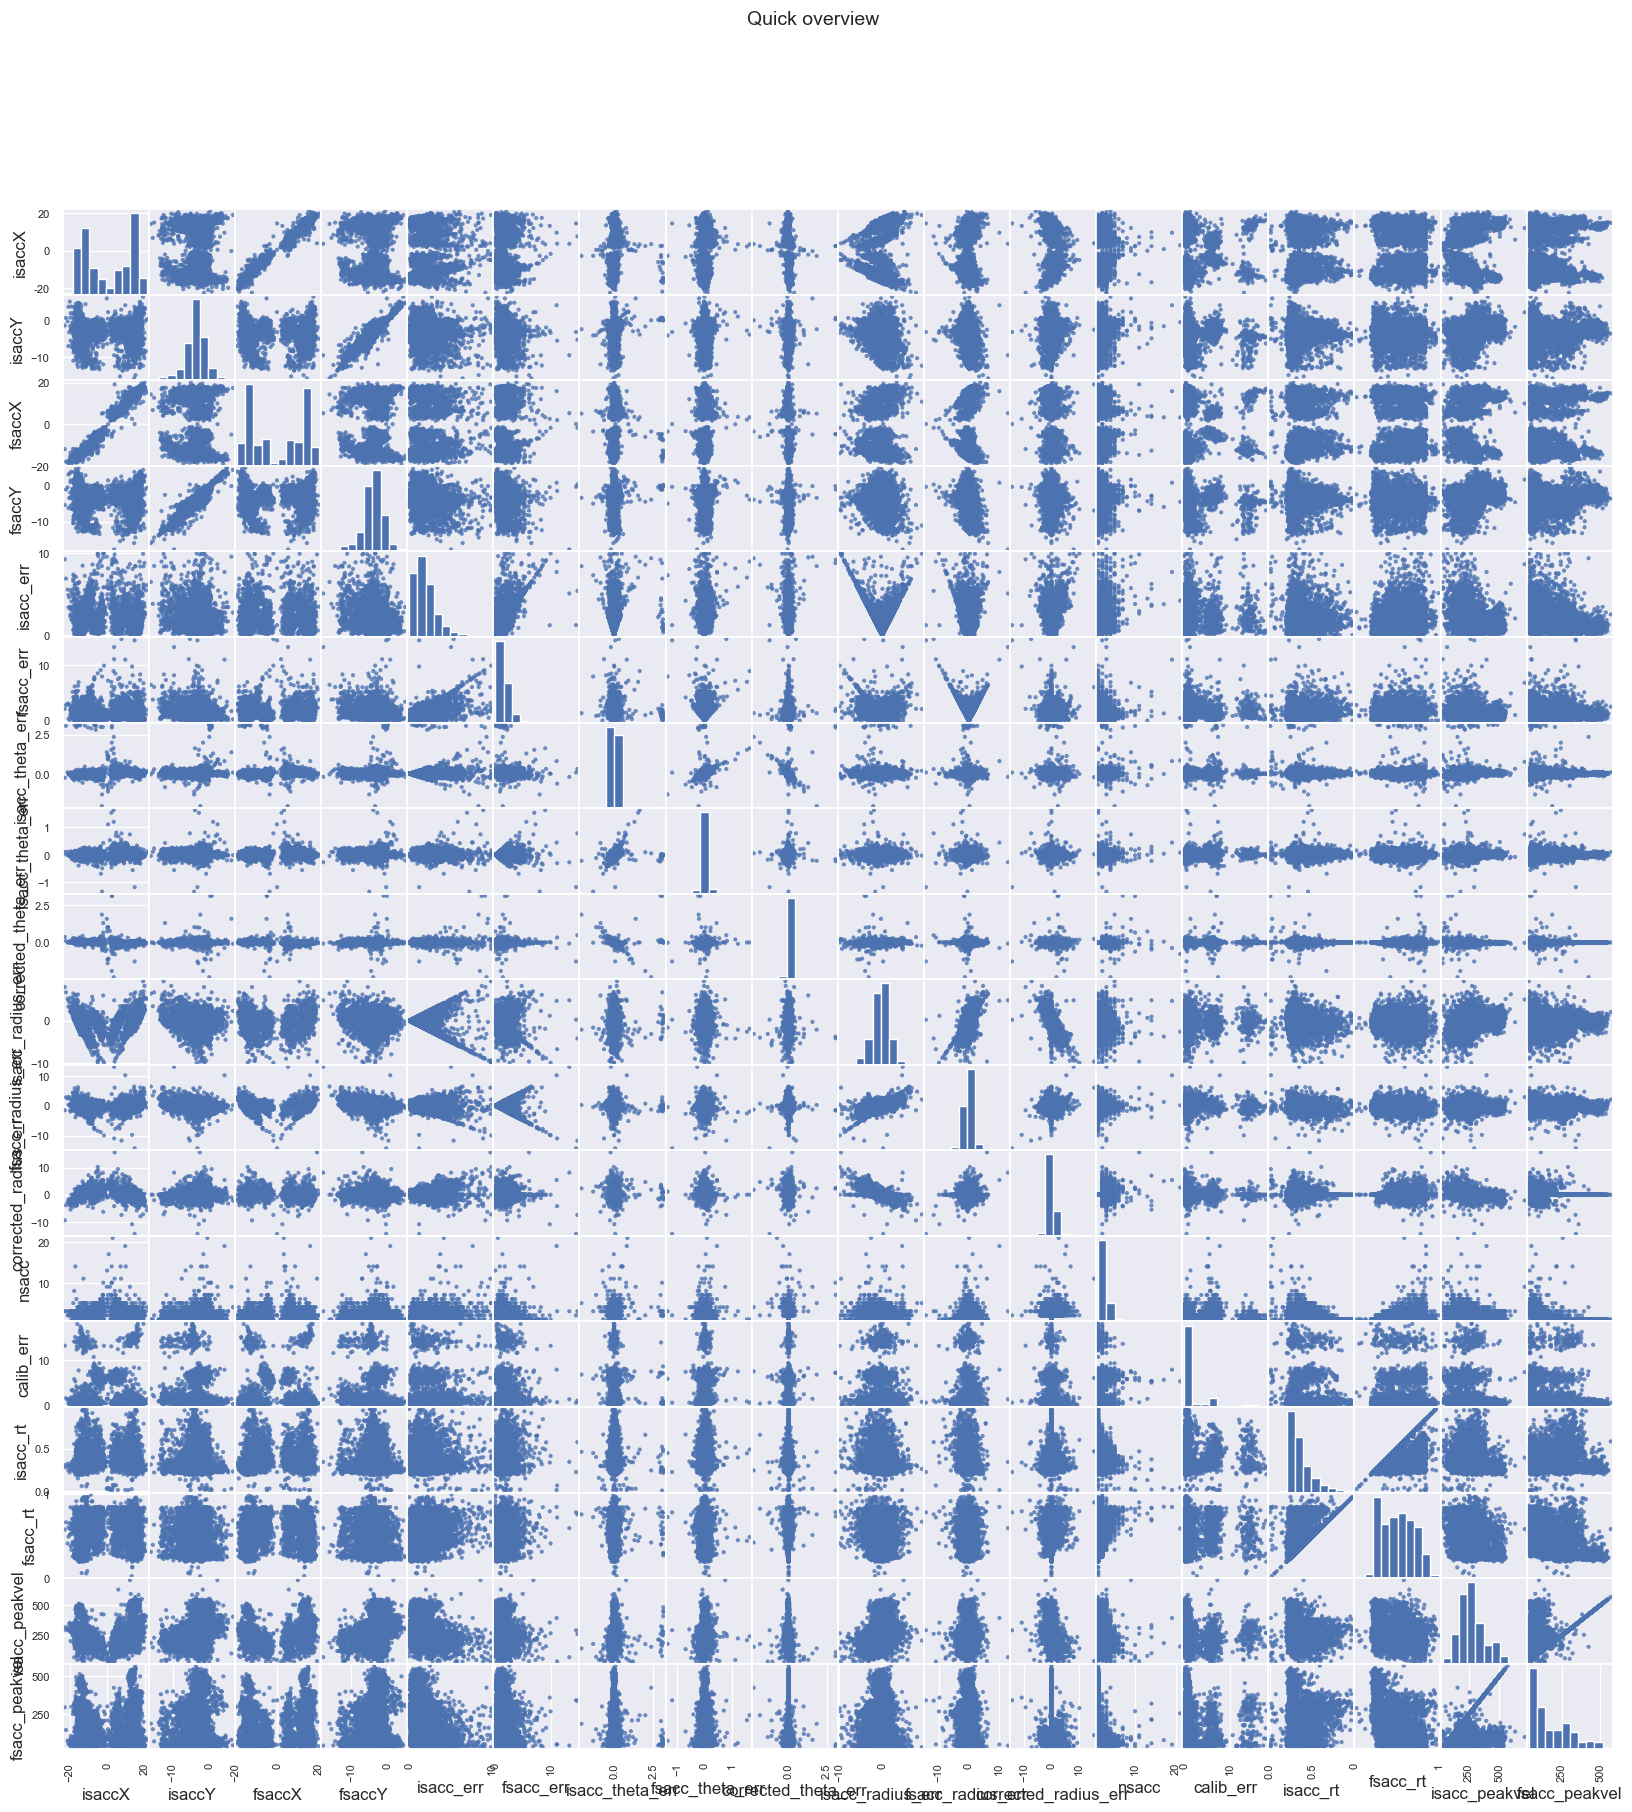

In [17]:
quick_visualization(df_filtered)

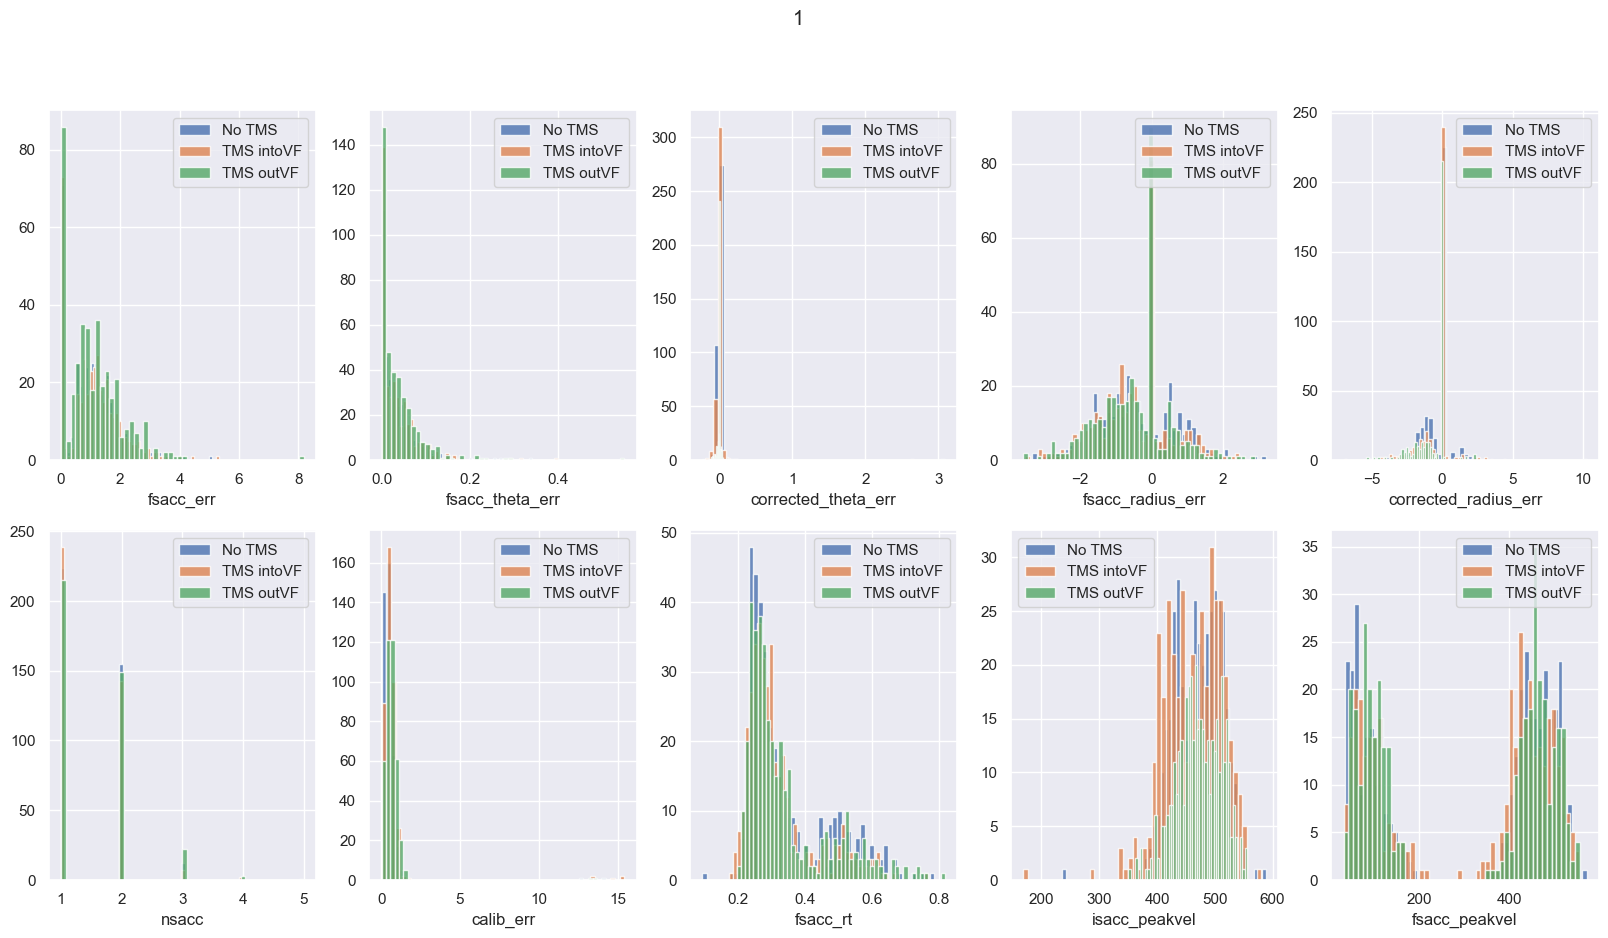

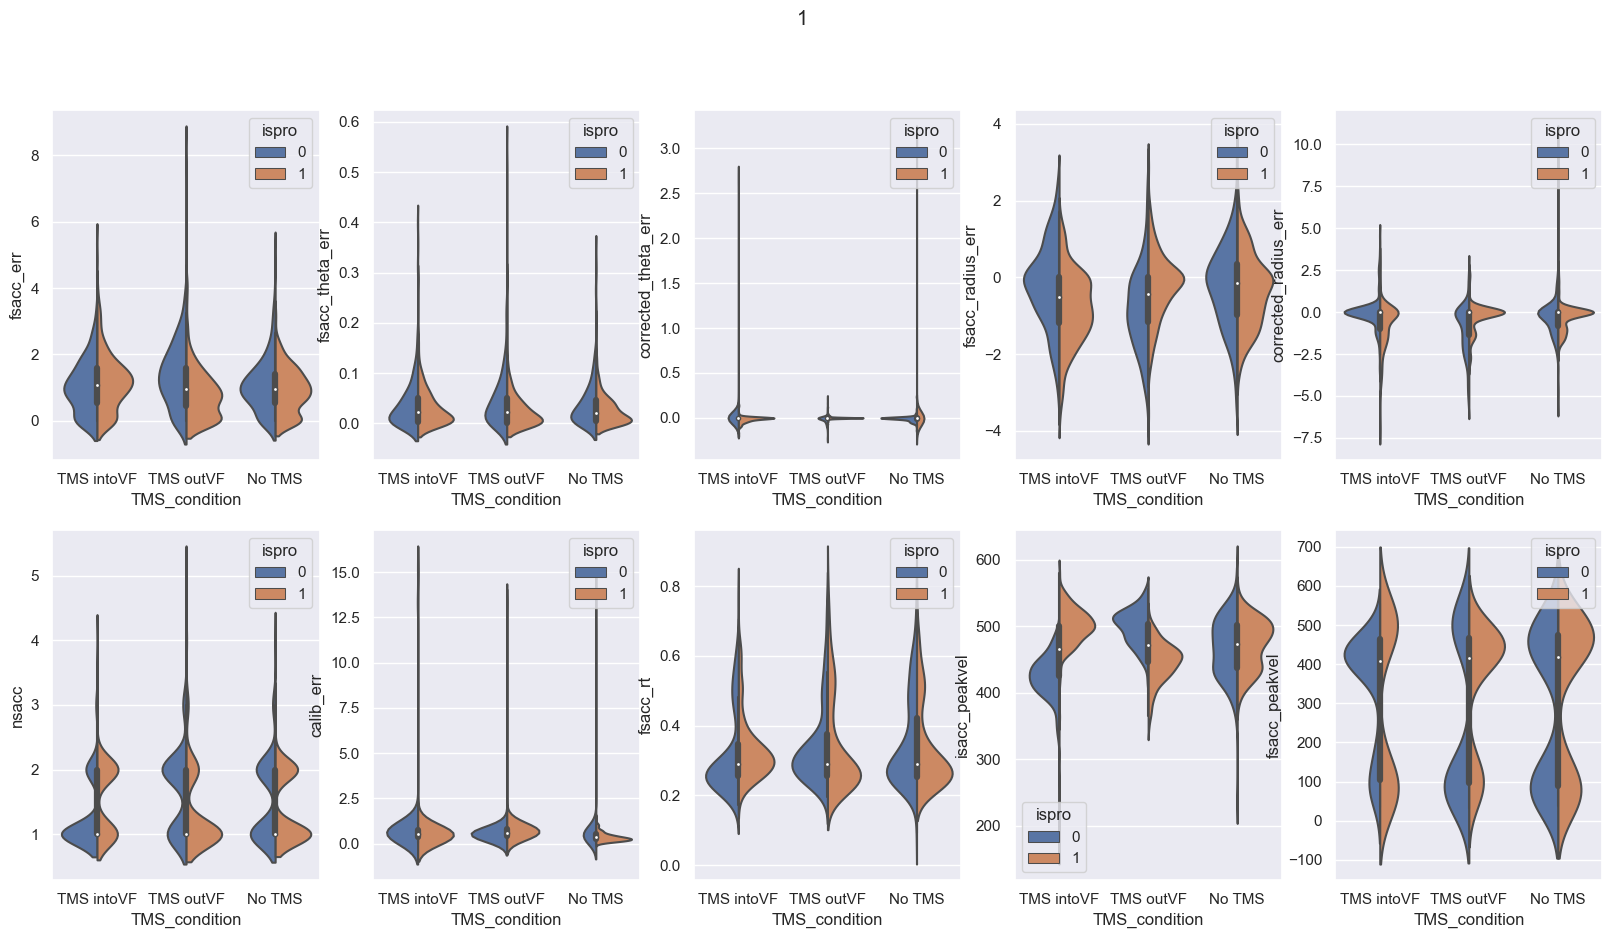

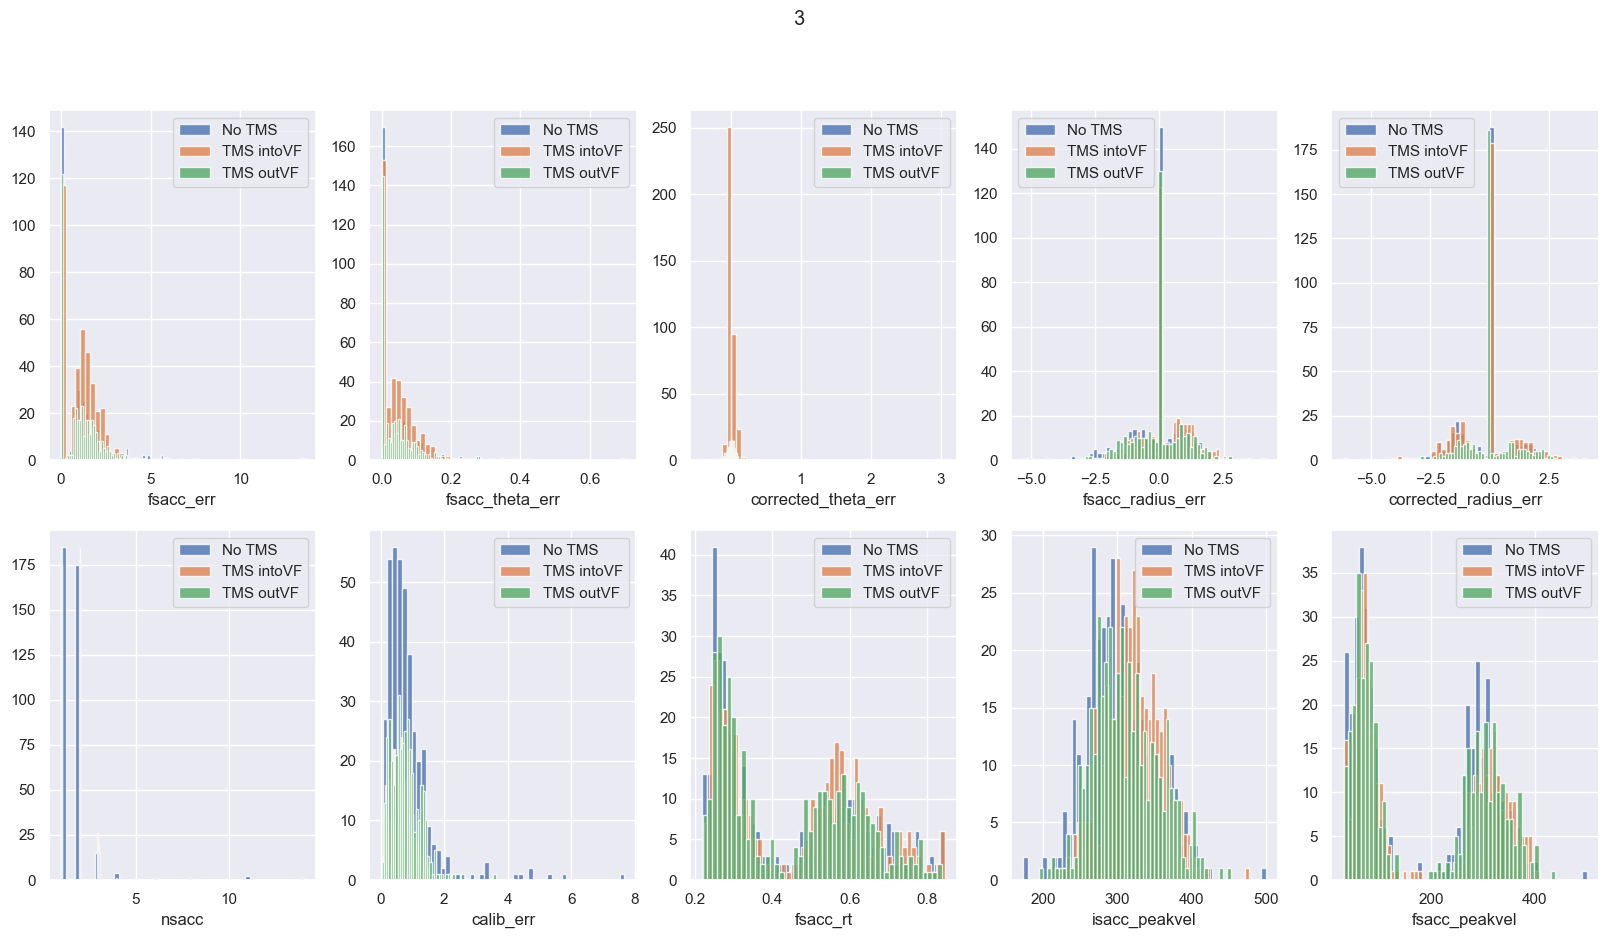

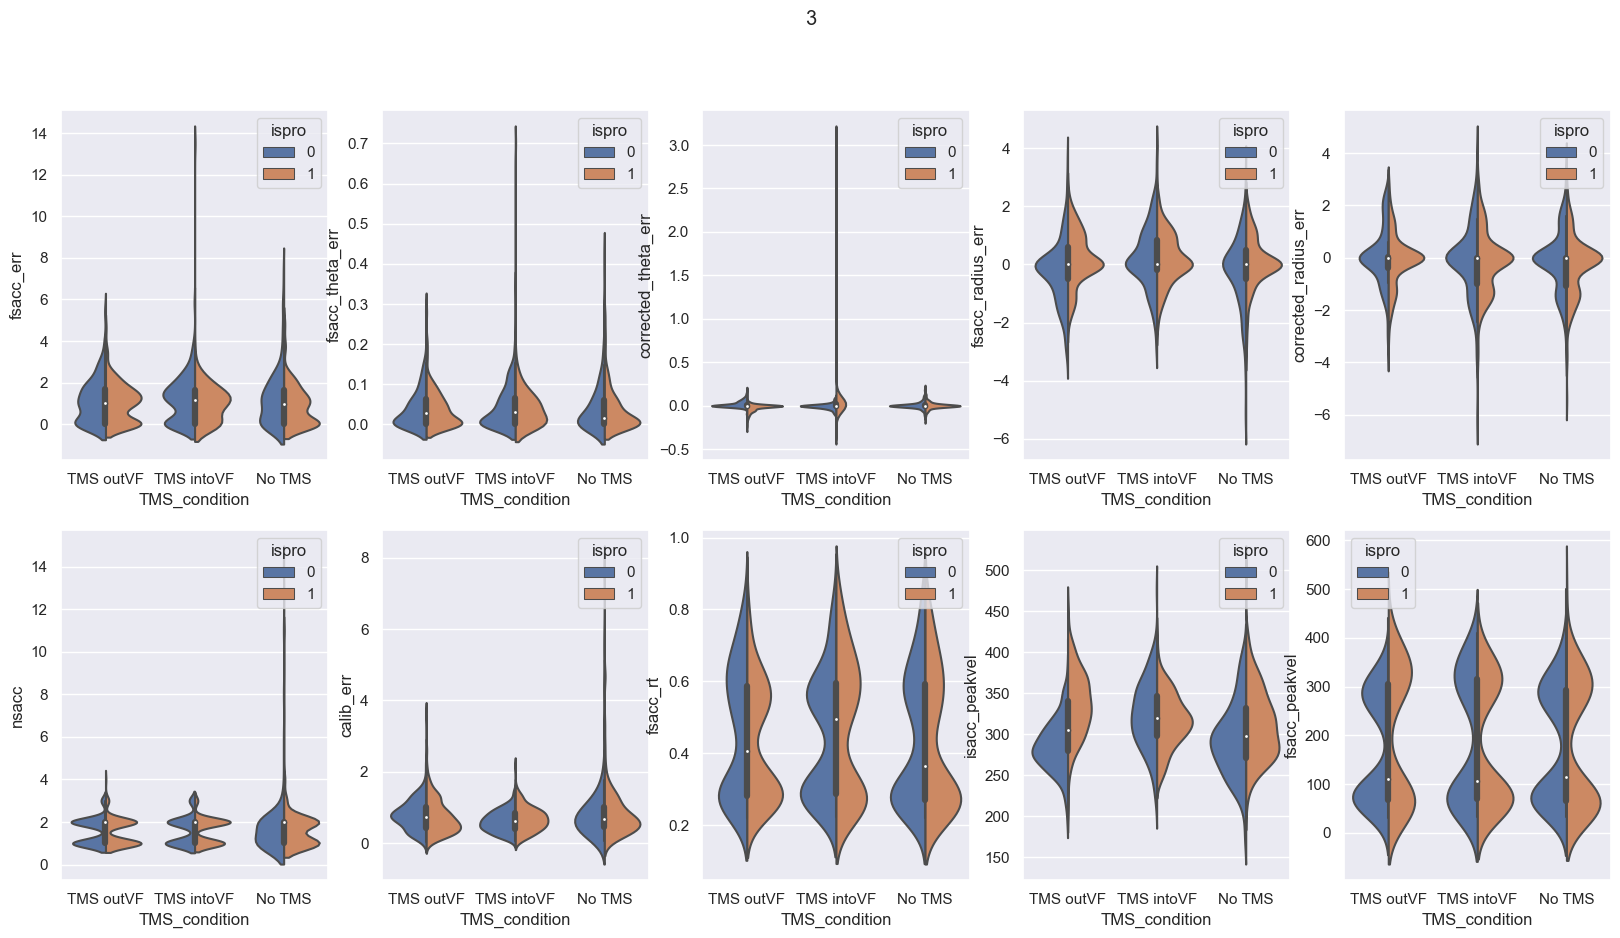

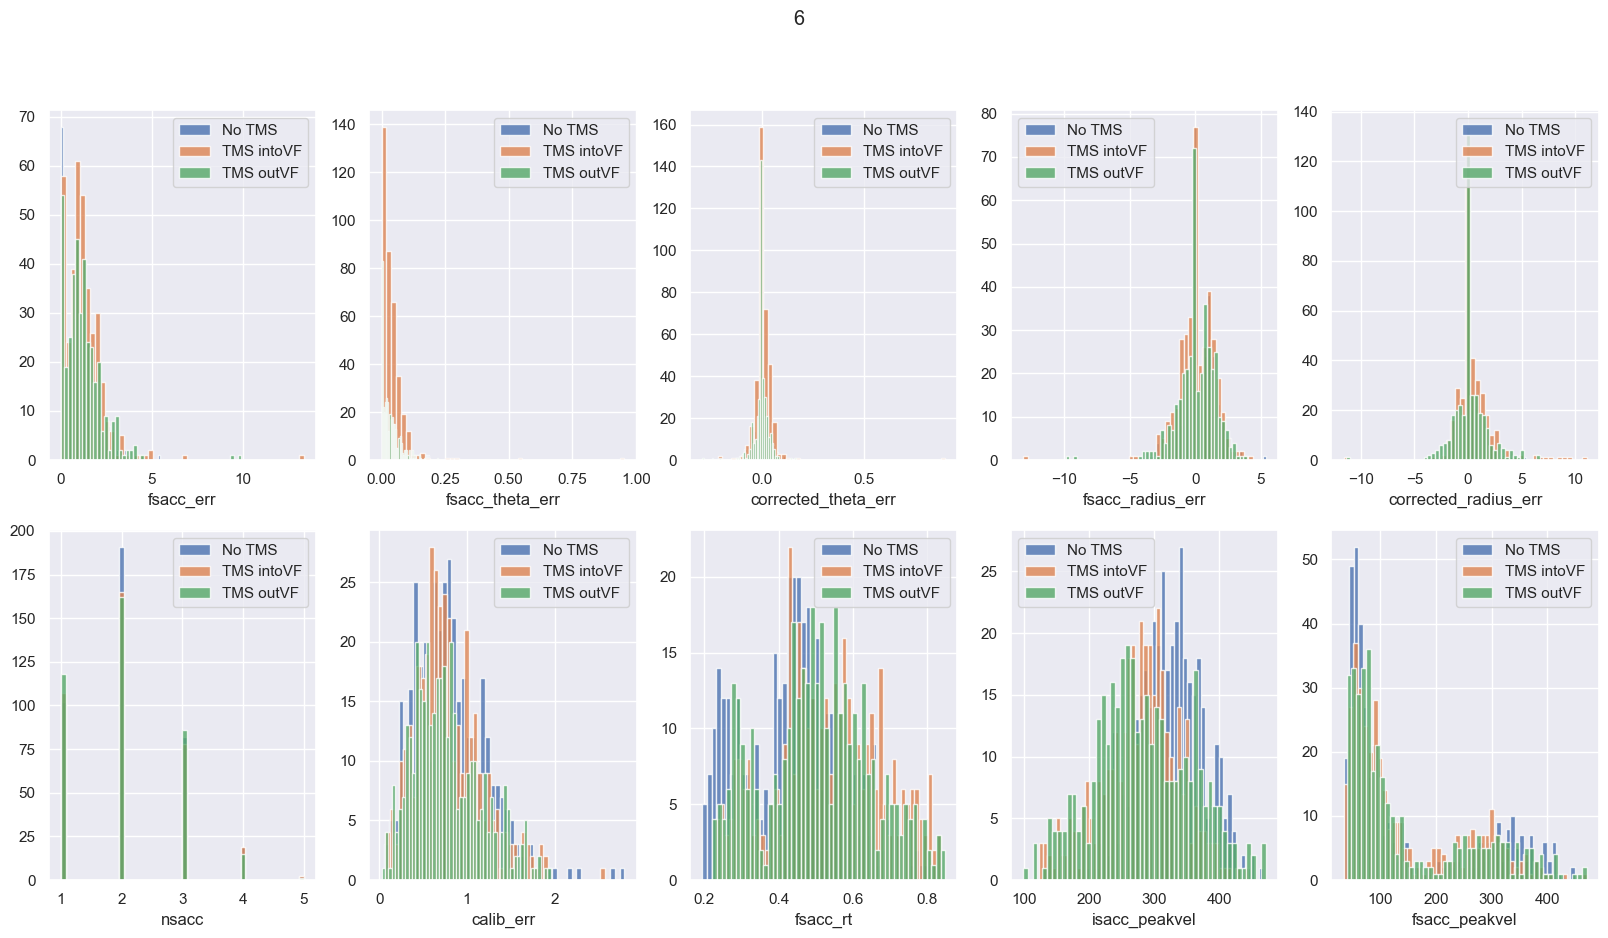

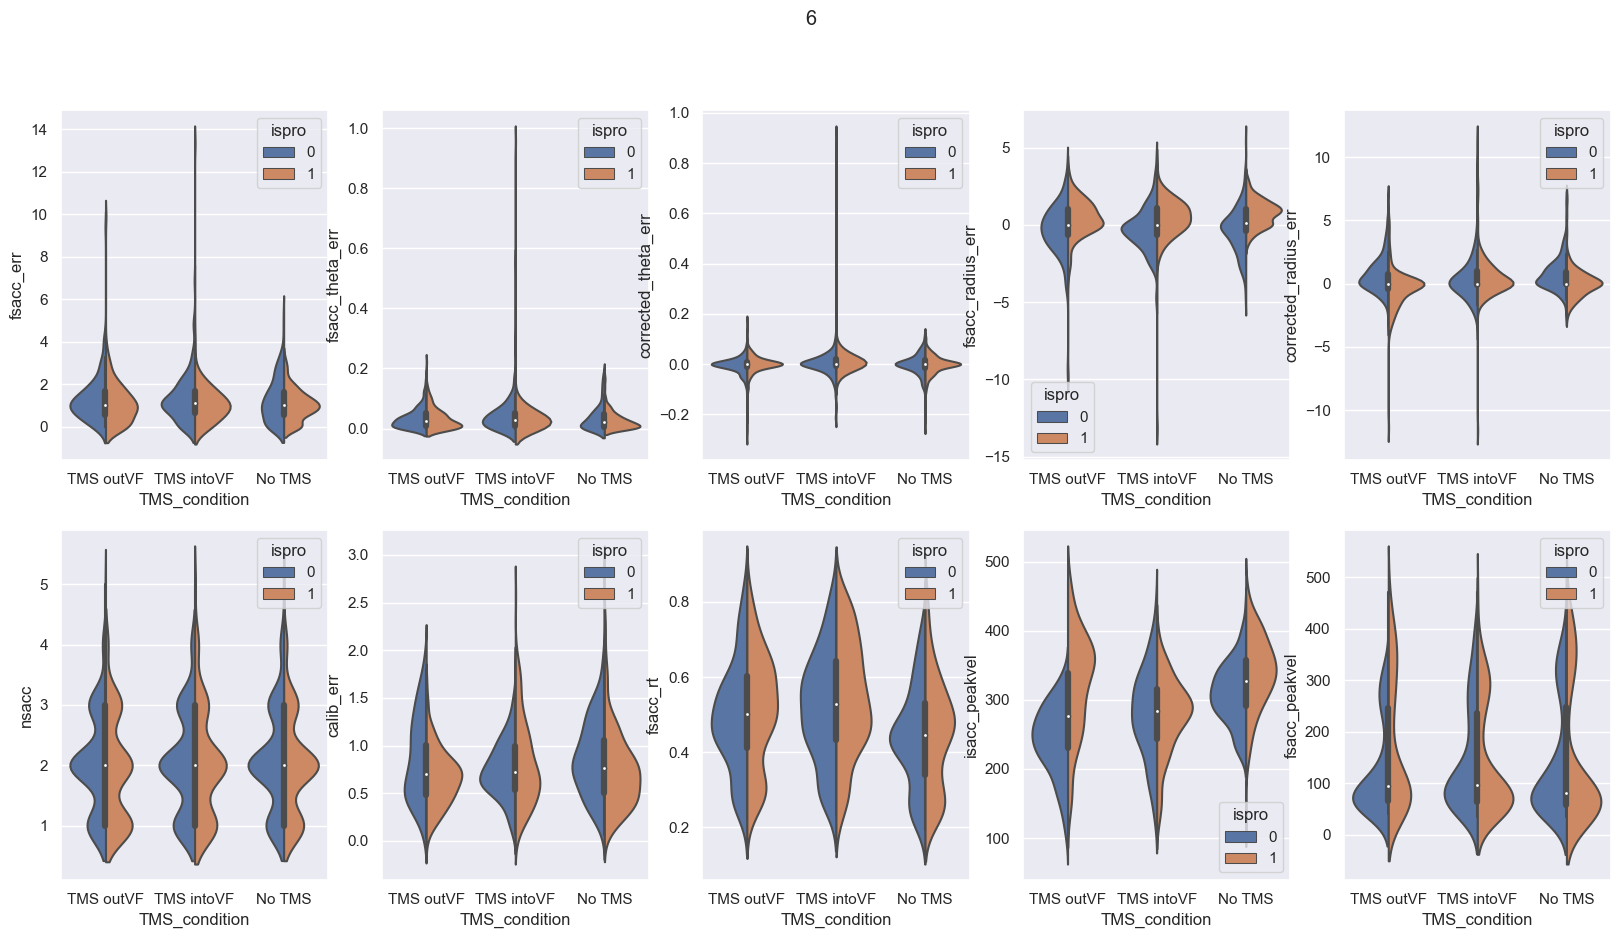

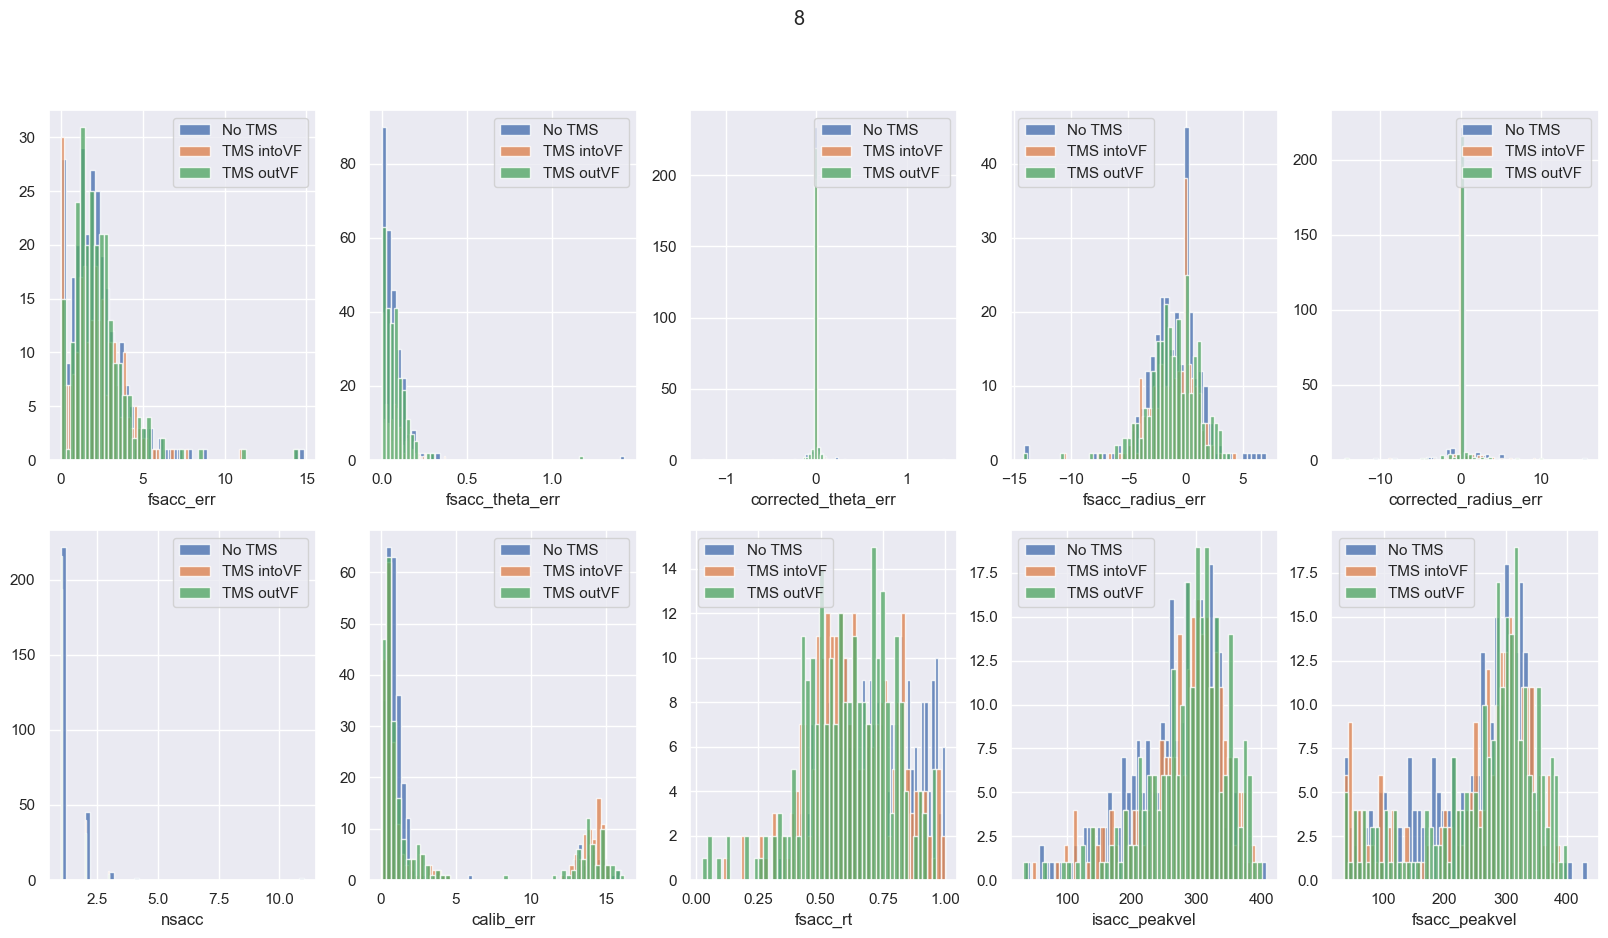

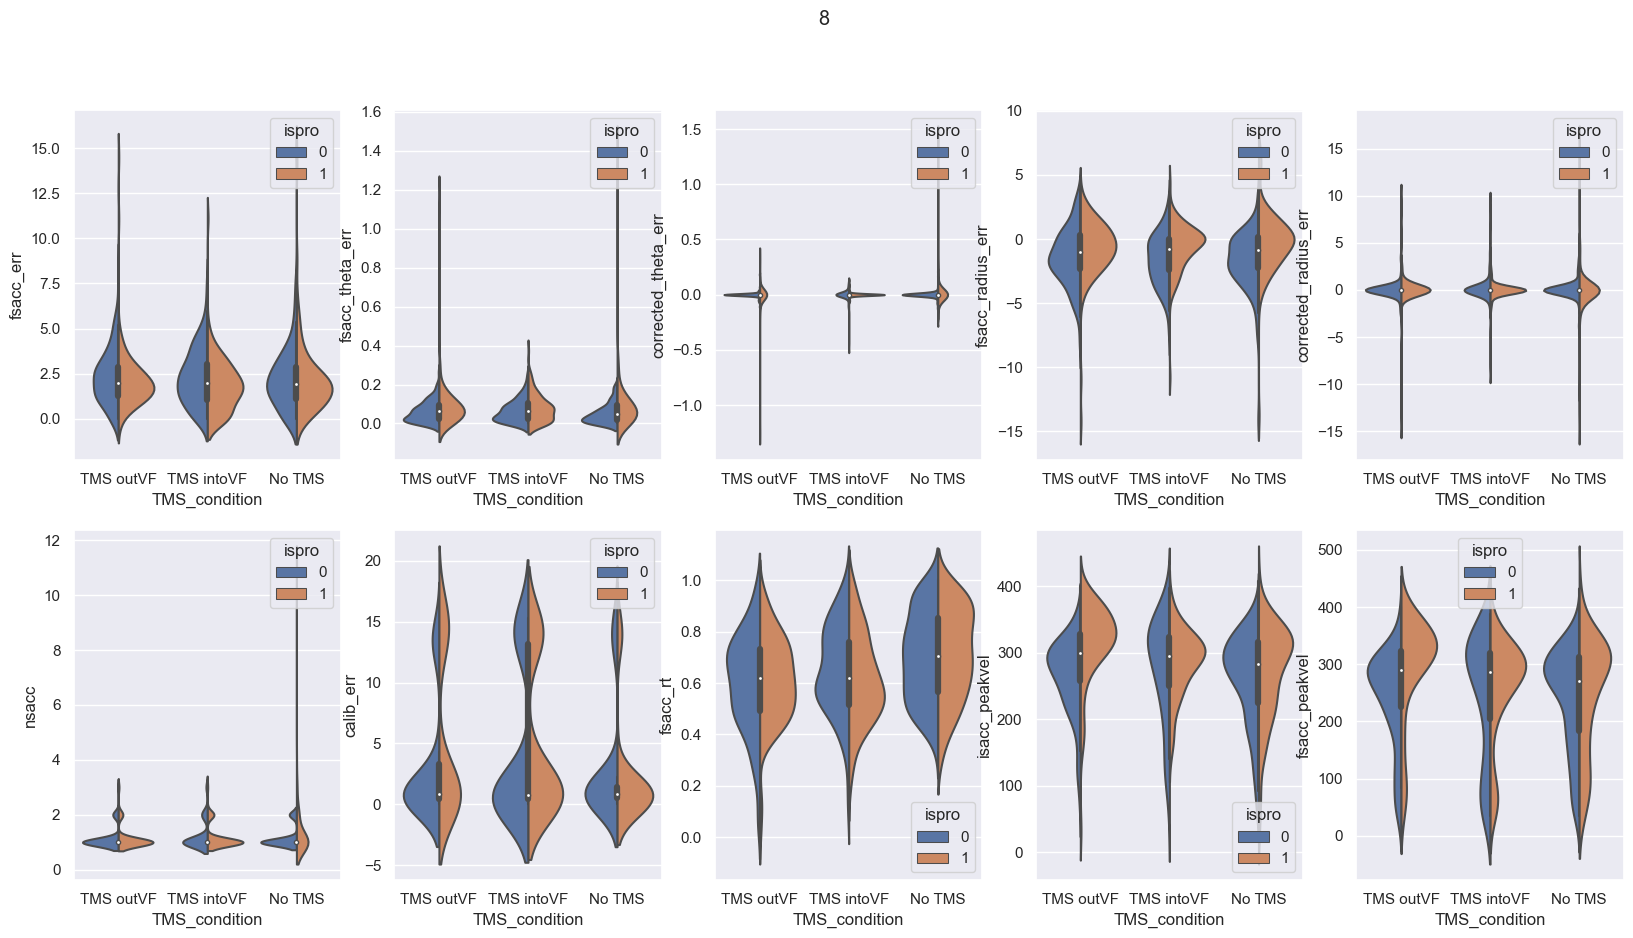

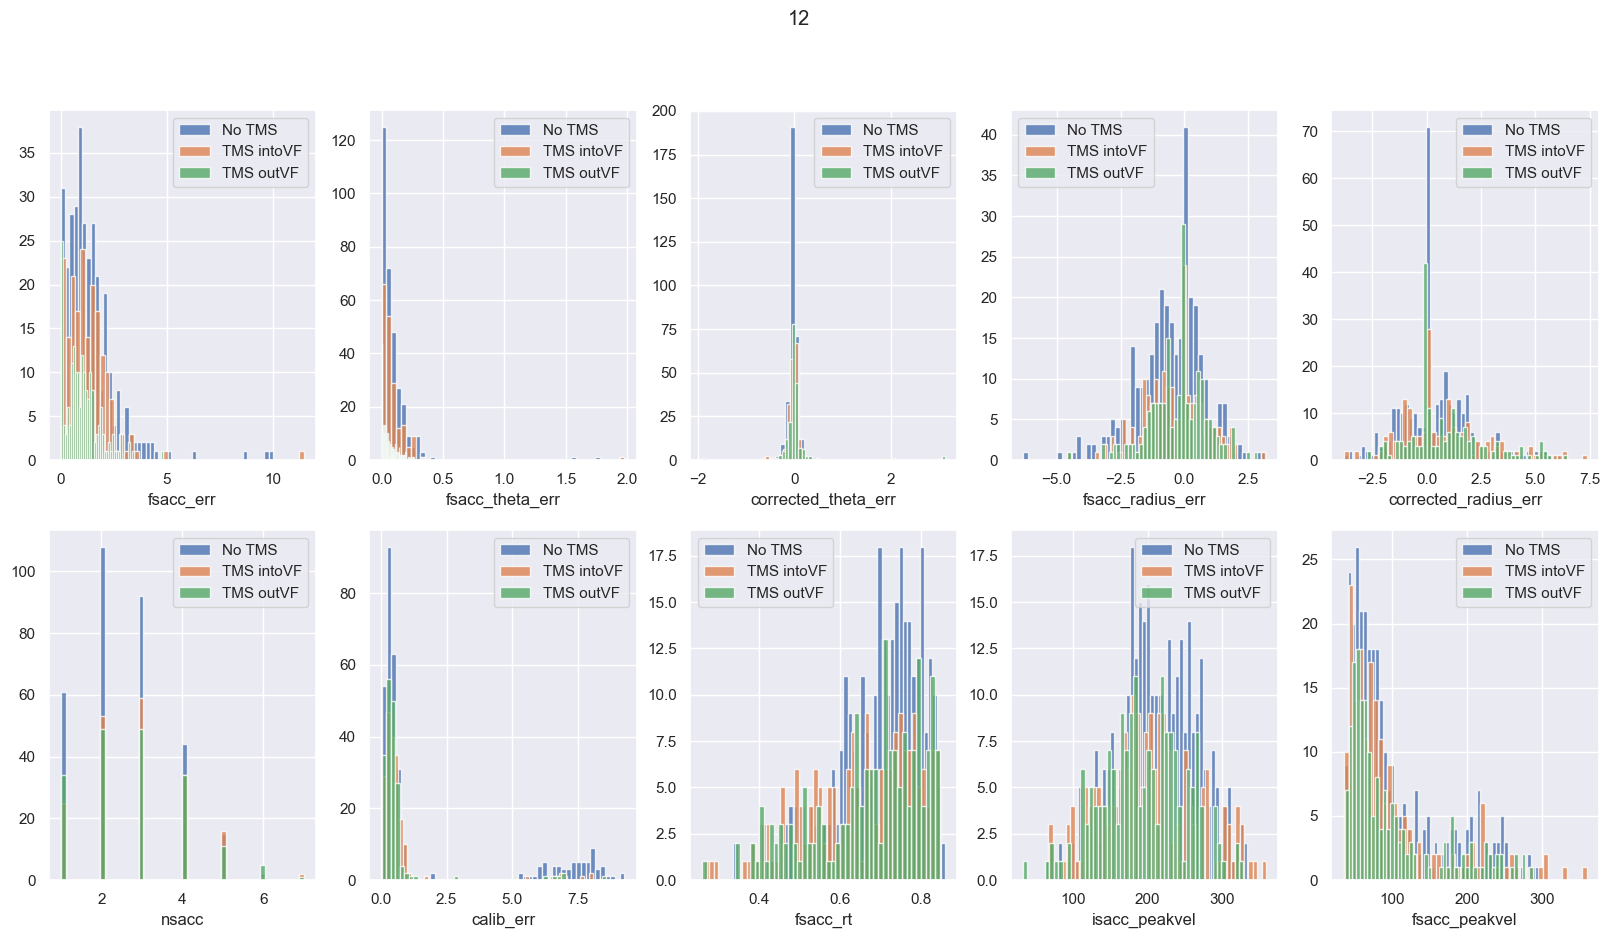

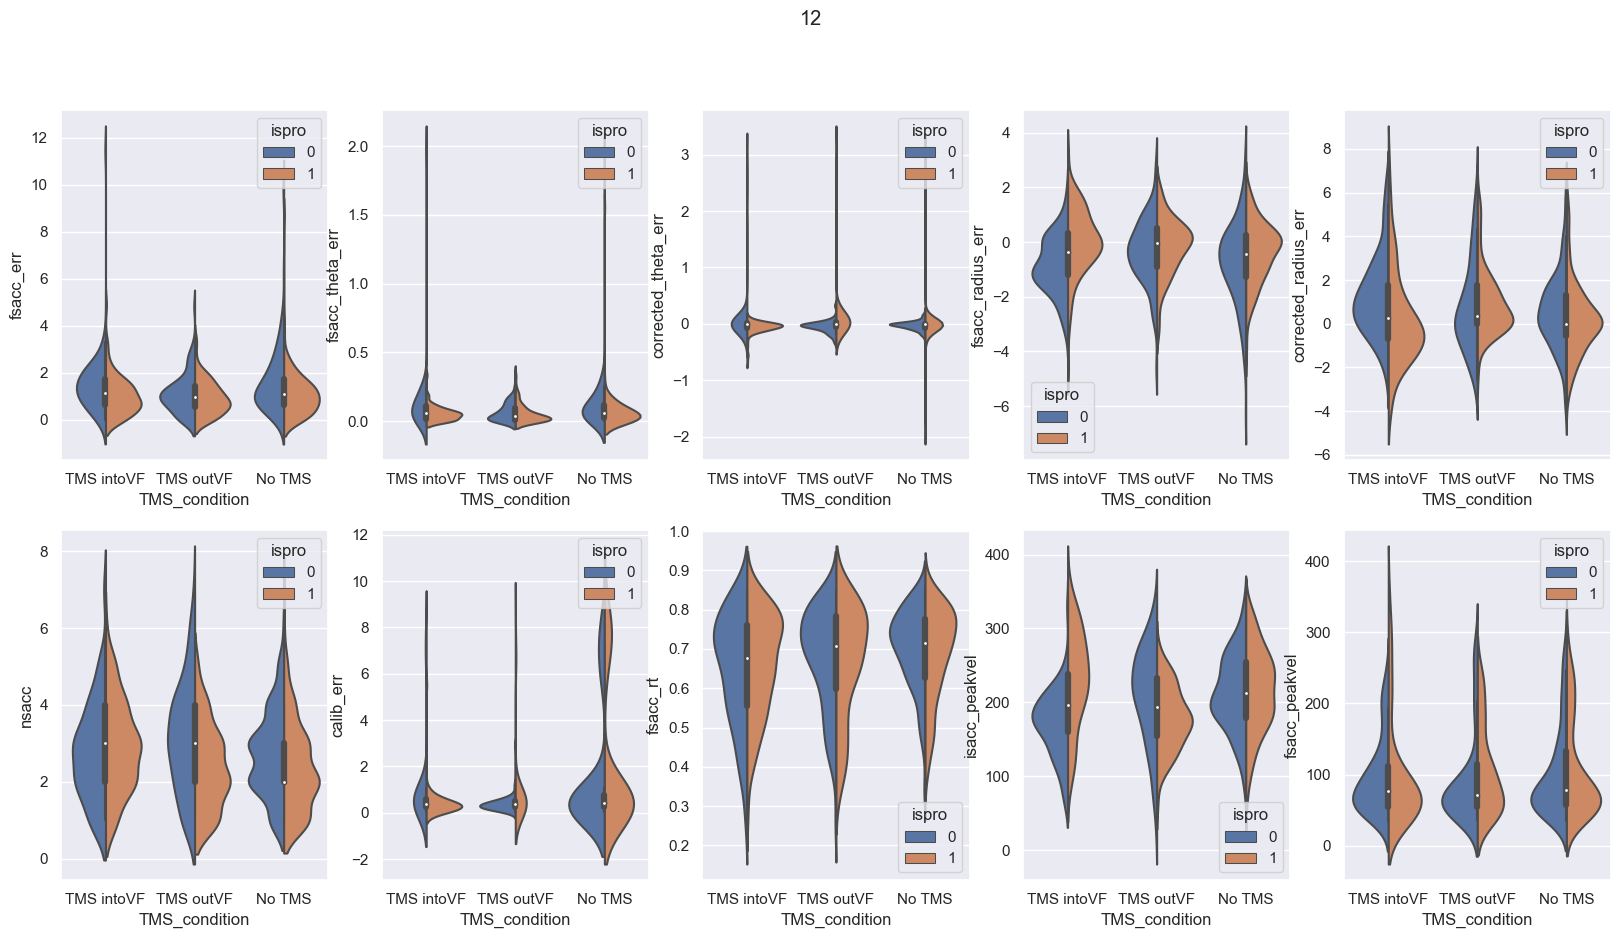

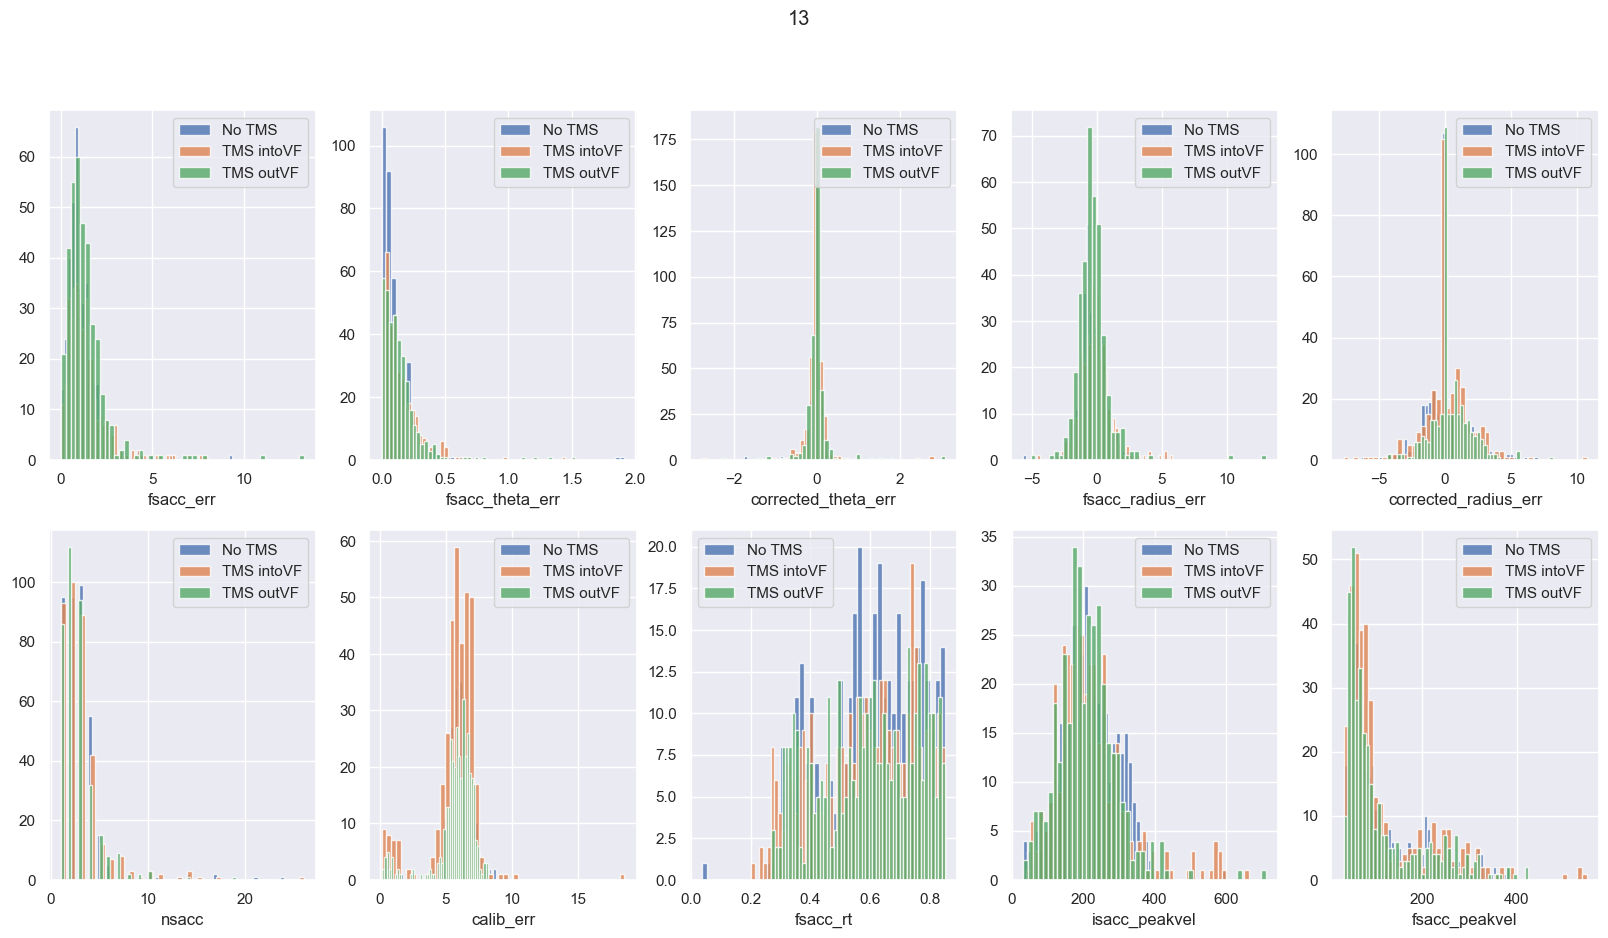

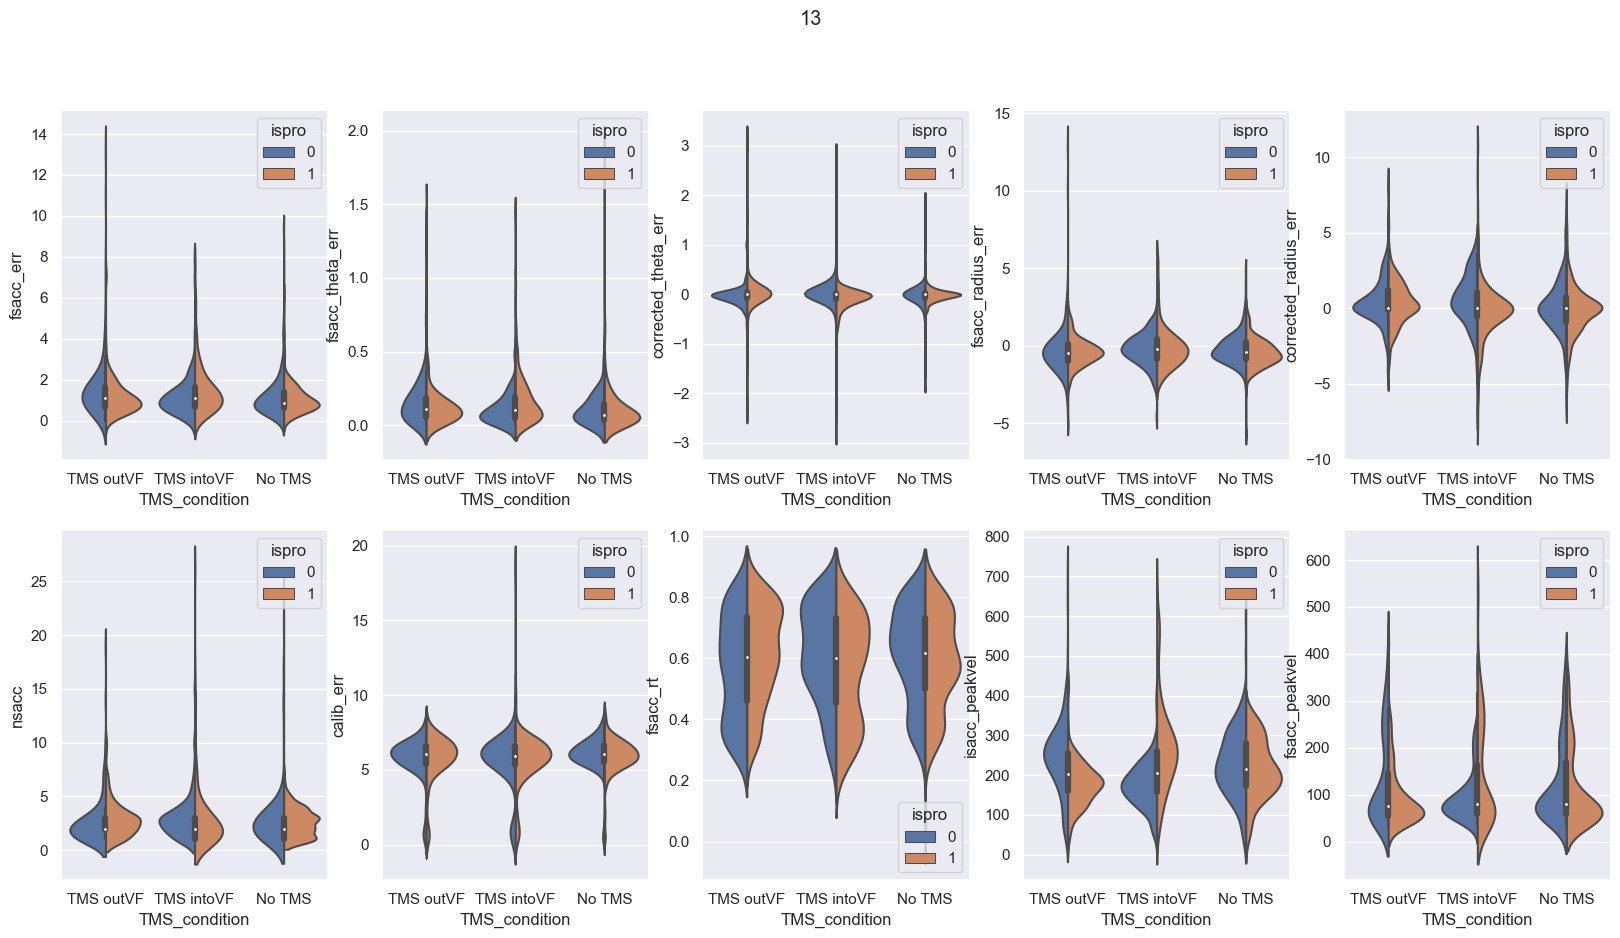

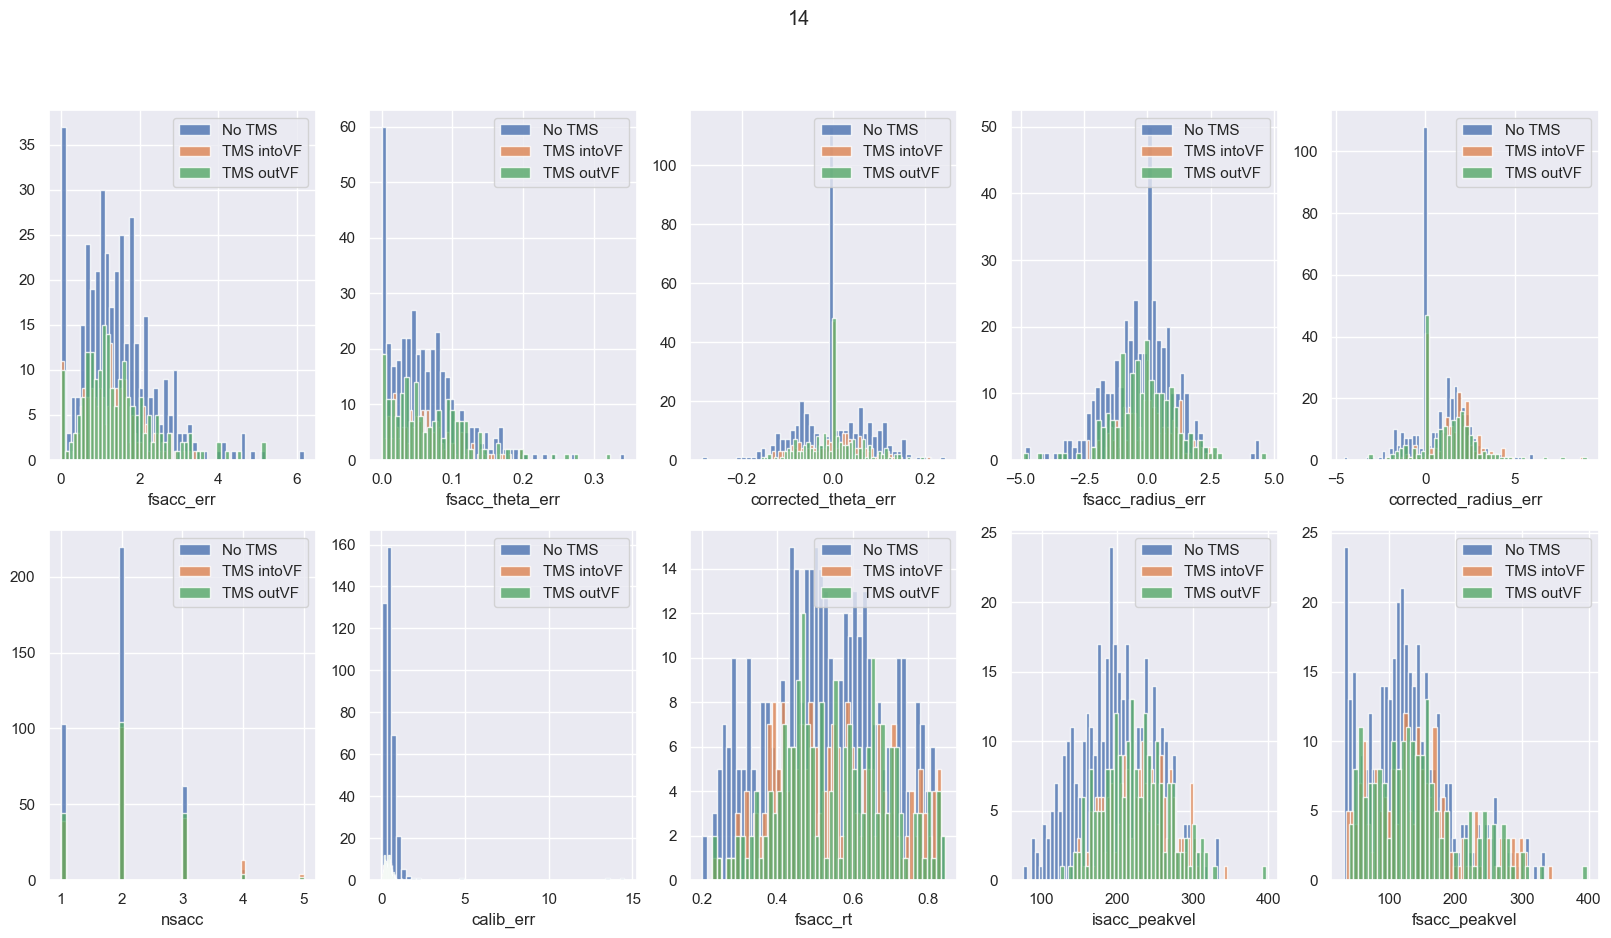

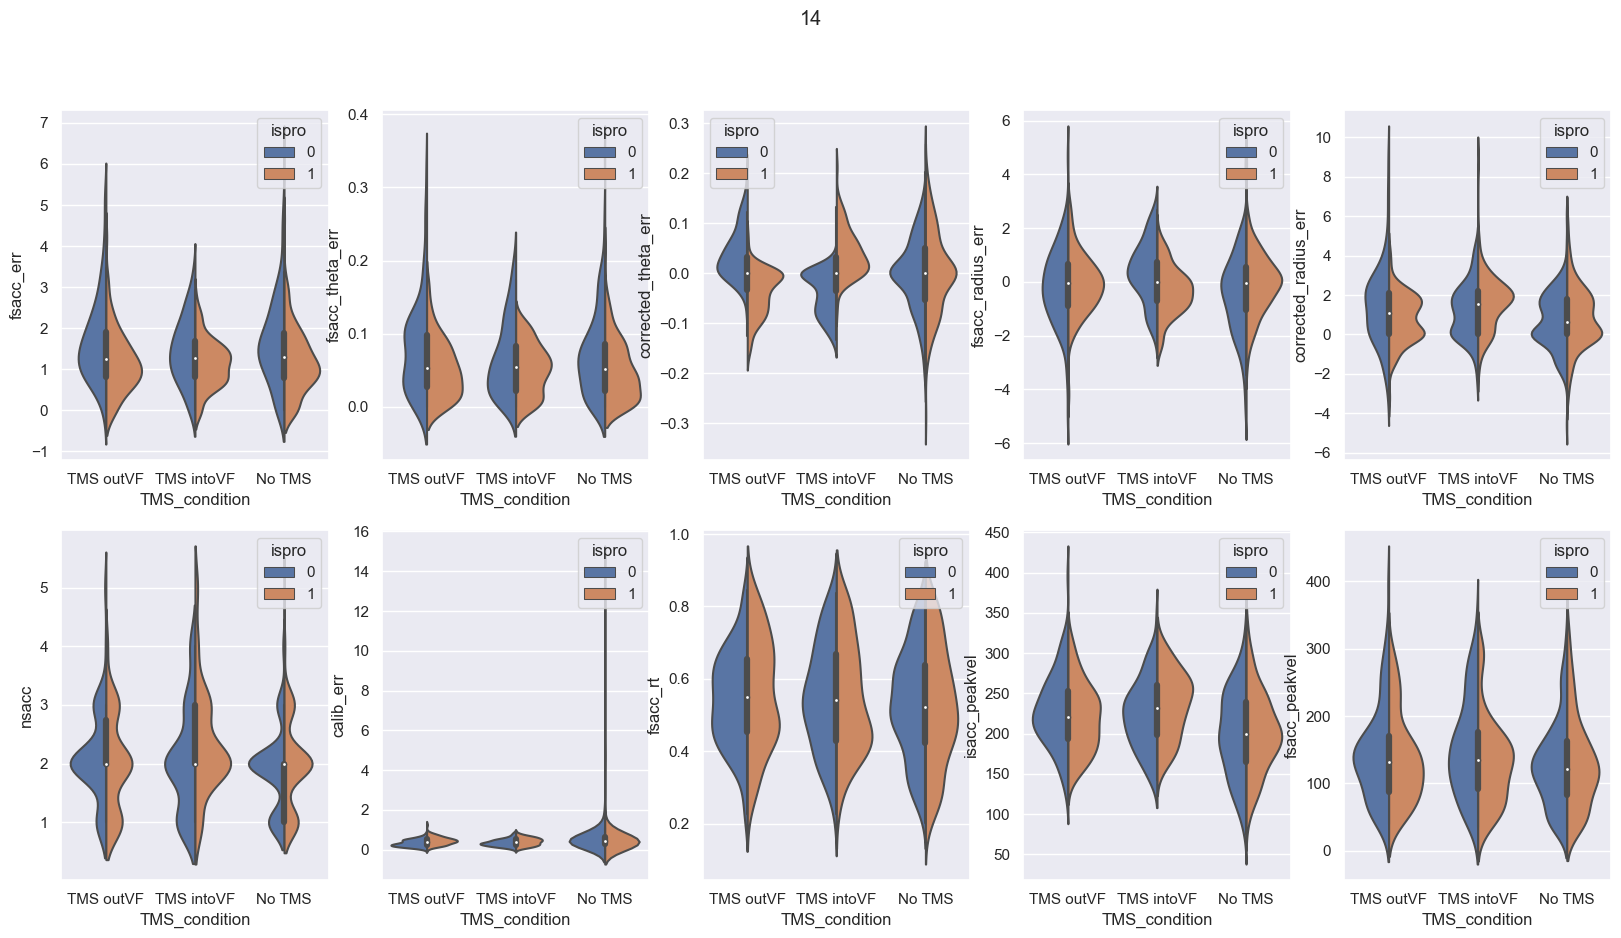

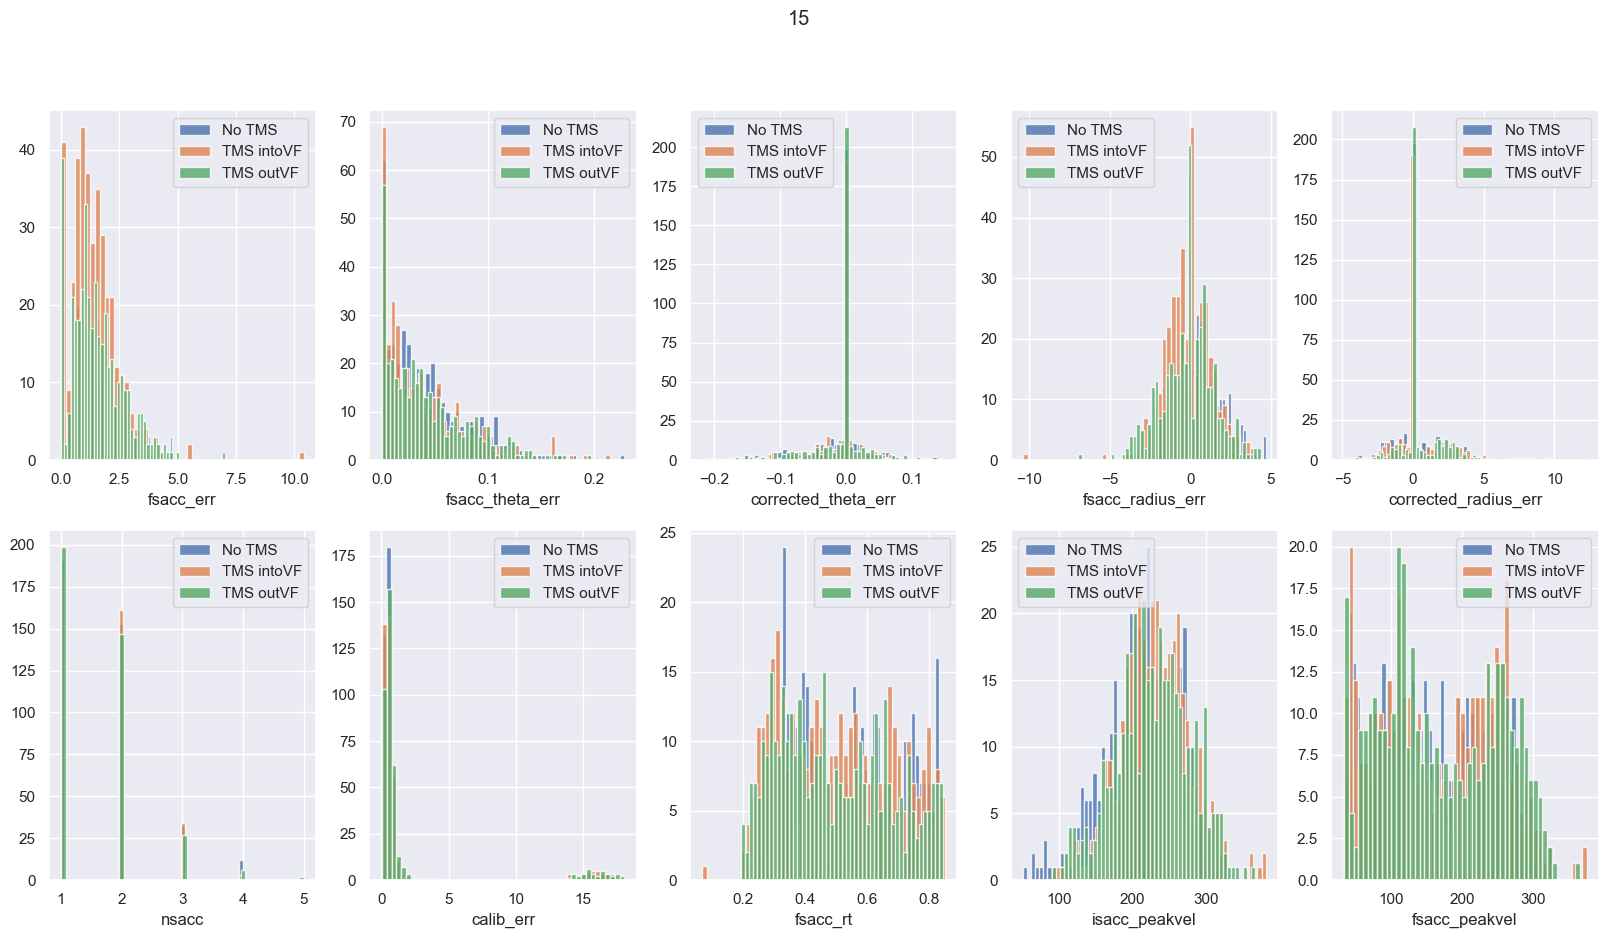

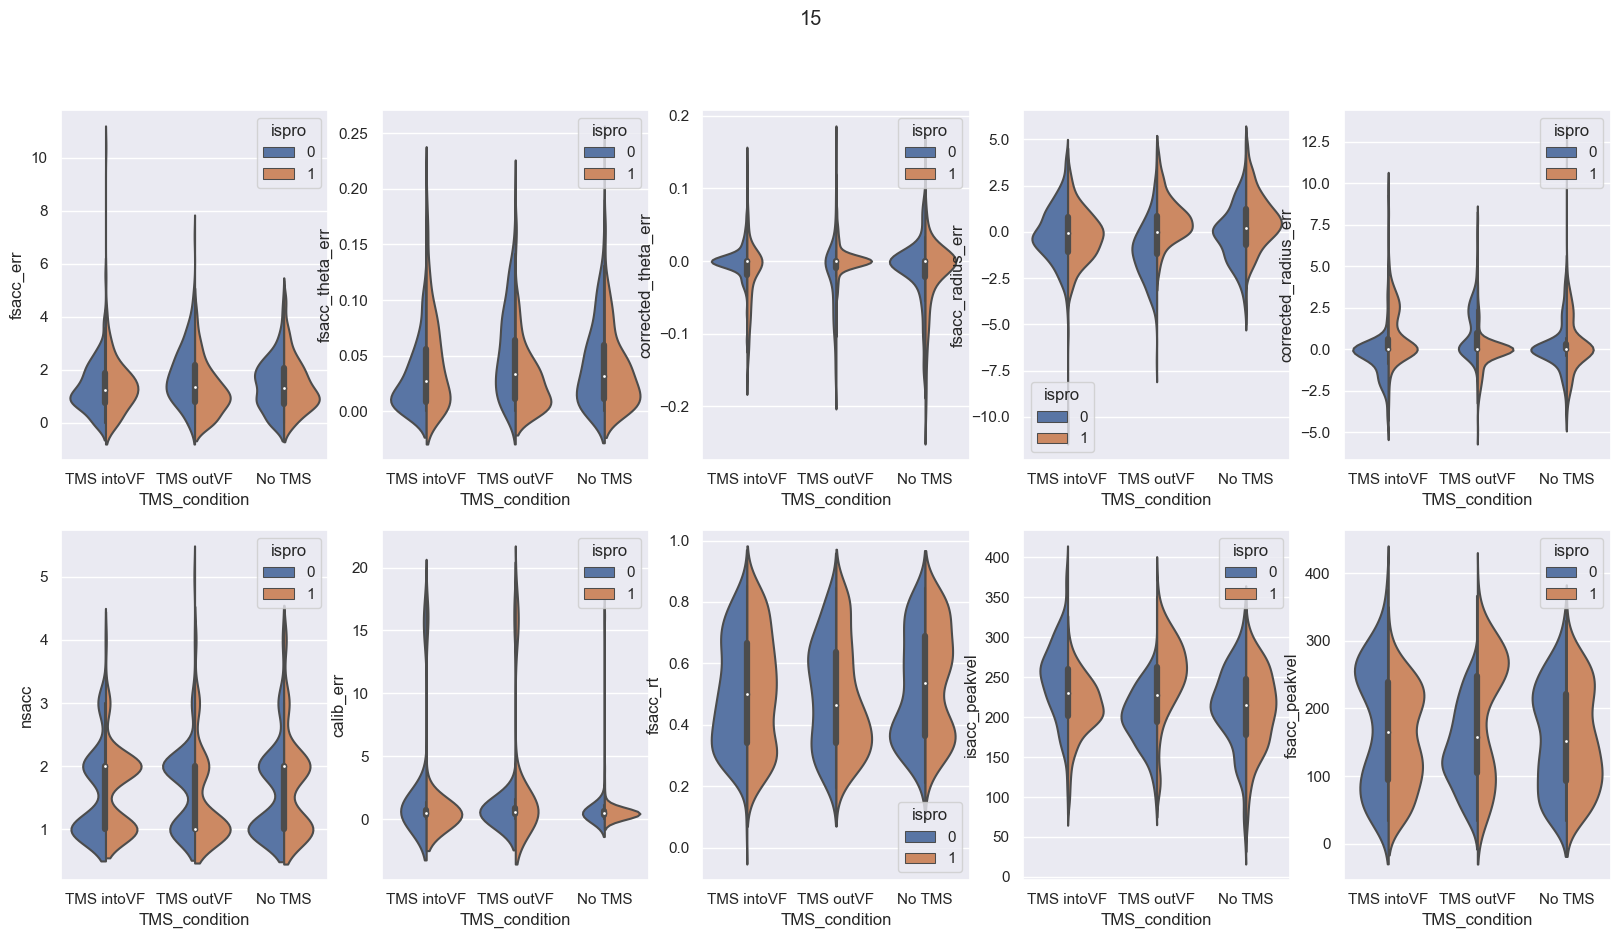

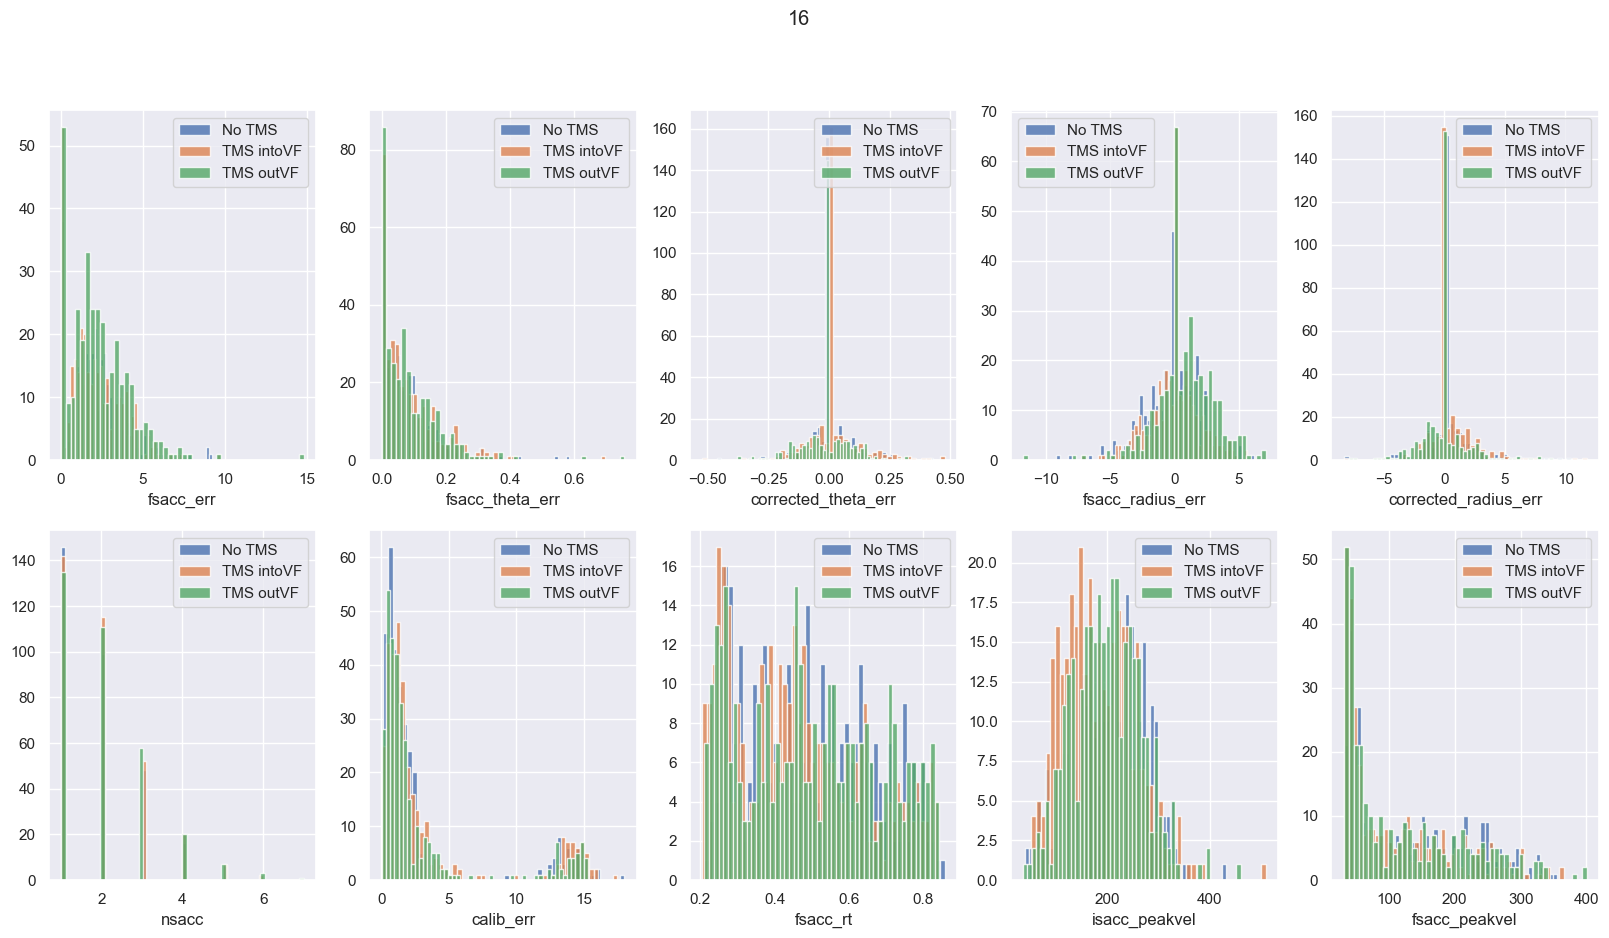

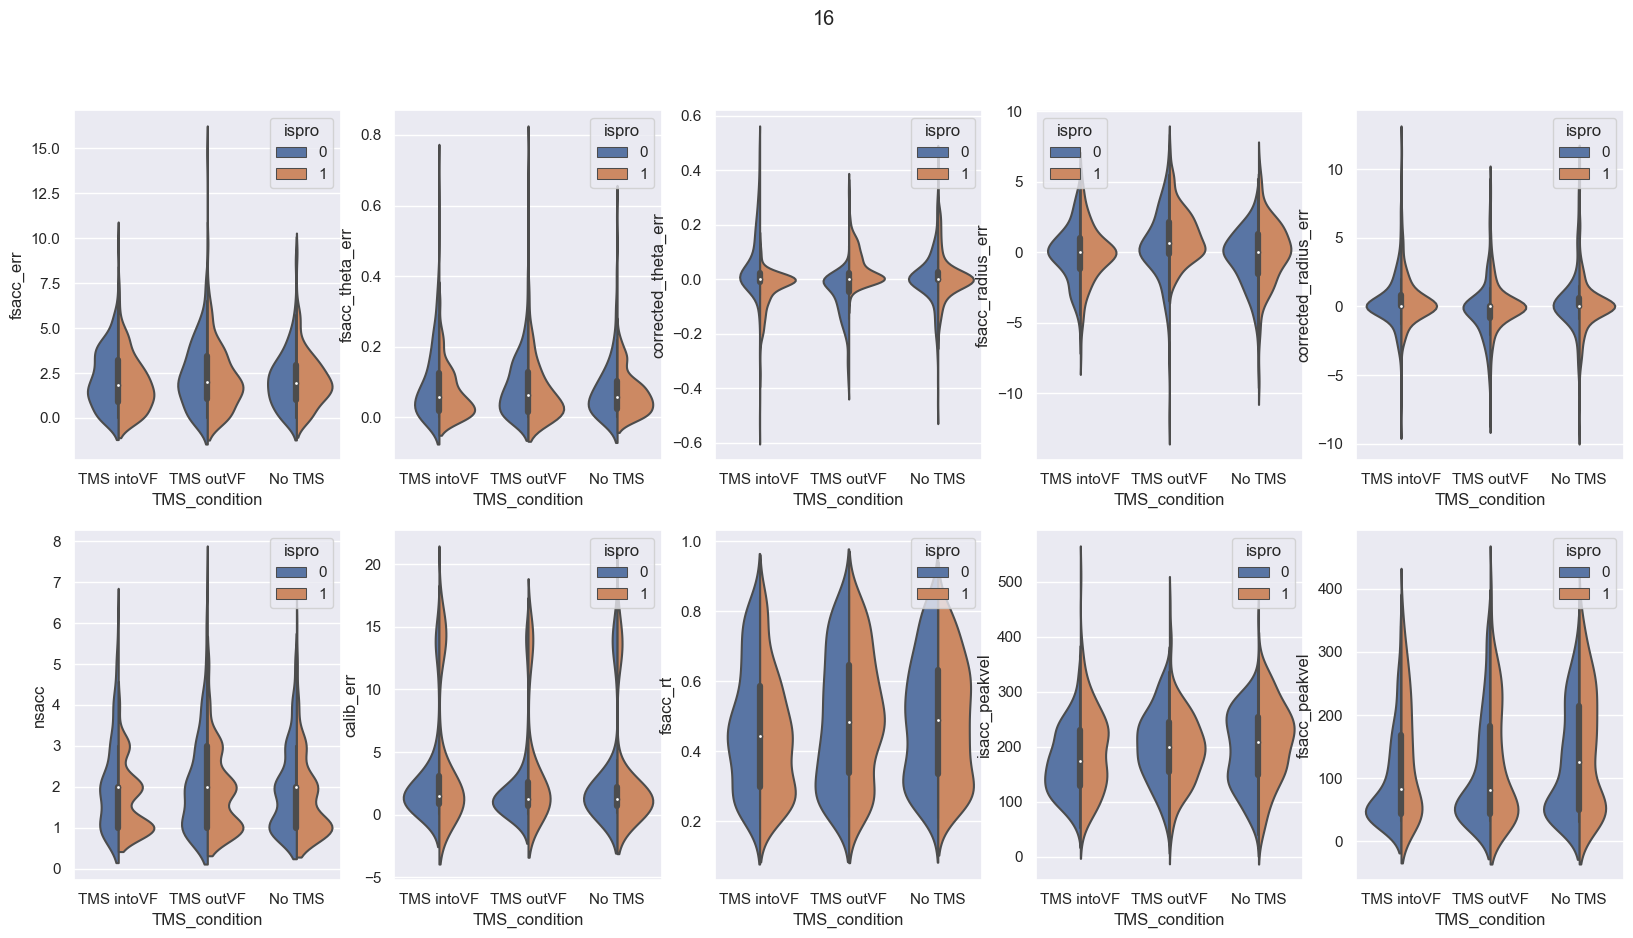

In [18]:
distribution_plots(df_filtered)